In [1]:
import pandas as pd
from rctgan import Metadata
from rctgan.relational import RCTGAN
import pickle

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = pd.read_csv('../Datasets/SRE Domain/real_data.csv')
dataset

incident_id             title  severity                 service  \
0      INC1000         CPU spike     major             API Gateway   
1      INC1001     Service crash     major             API Gateway   
2      INC1002         CPU spike   warning             API Gateway   
3      INC1003     Service crash     minor          Logging System   
4      INC1004  Database timeout   warning          Logging System   
..         ...               ...       ...                     ...   
95     INC1095  Database timeout   warning  Authentication Service   
96     INC1096       Memory leak   warning             API Gateway   
97     INC1097     Service crash  critical             API Gateway   
98     INC1098  Database timeout  critical       Payment Processor   
99     INC1099     Service crash  critical       Payment Processor   

     assigned_to                   timestamp       status  \
0     sre-team-2  2025-02-15T21:51:15.927485  in-progress   
1     infra-team  2025-02-17T01:27:15.927485         open   
2     sre-team-1  2025-02-10T23:36:15.927485  in-progress   
3    ops-support  2025-02-07T01:51:15.927485     resolved   
4     sre-team-2  2025-03-03T22:34:15.927485     resolved   
..           ...                         ...          ...   
95   ops-support  2025-02-12T06:41:15.927485  in-progress   
96    sre-team-2  2025-02-12T14:29:15.927485  in-progress   
97  on-call-team  2025-02-21T18:40:15.927485  in-progress   
98   ops-support  2025-02-10T11:11:15.927485  in-progress   
99   ops-support  2025-02-10T03:26:15.927485  in-progress   

    resolution_time_minutes       resolution_notes  
0                       179  Pending investigation  
1                       559  Pending investigation  
2                      4211  Pending investigation  
3                      3218        Issue mitigated  
4                        36        Issue mitigated  
..                      ...                    ...  
95                     3290  Pending investigation  
96                     1310  Pending investigation  
97                      248  Pending investigation  
98                     1416  Pending investigation  
99                      452  Pending investigation  

[100 rows x 9 columns]

# Transformation

In [4]:
from datetime import datetime

In [5]:
dataset['time_logged'] = dataset['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()))
dataset

incident_id             title  severity                 service  \
0      INC1000         CPU spike     major             API Gateway   
1      INC1001     Service crash     major             API Gateway   
2      INC1002         CPU spike   warning             API Gateway   
3      INC1003     Service crash     minor          Logging System   
4      INC1004  Database timeout   warning          Logging System   
..         ...               ...       ...                     ...   
95     INC1095  Database timeout   warning  Authentication Service   
96     INC1096       Memory leak   warning             API Gateway   
97     INC1097     Service crash  critical             API Gateway   
98     INC1098  Database timeout  critical       Payment Processor   
99     INC1099     Service crash  critical       Payment Processor   

     assigned_to                   timestamp       status  \
0     sre-team-2  2025-02-15T21:51:15.927485  in-progress   
1     infra-team  2025-02-17T01:27:15.927485         open   
2     sre-team-1  2025-02-10T23:36:15.927485  in-progress   
3    ops-support  2025-02-07T01:51:15.927485     resolved   
4     sre-team-2  2025-03-03T22:34:15.927485     resolved   
..           ...                         ...          ...   
95   ops-support  2025-02-12T06:41:15.927485  in-progress   
96    sre-team-2  2025-02-12T14:29:15.927485  in-progress   
97  on-call-team  2025-02-21T18:40:15.927485  in-progress   
98   ops-support  2025-02-10T11:11:15.927485  in-progress   
99   ops-support  2025-02-10T03:26:15.927485  in-progress   

    resolution_time_minutes       resolution_notes  time_logged  
0                       179  Pending investigation   1739636475  
1                       559  Pending investigation   1739735835  
2                      4211  Pending investigation   1739210775  
3                      3218        Issue mitigated   1738873275  
4                        36        Issue mitigated   1741021455  
..                      ...                    ...          ...  
95                     3290  Pending investigation   1739322675  
96                     1310  Pending investigation   1739350755  
97                      248  Pending investigation   1740143415  
98                     1416  Pending investigation   1739166075  
99                      452  Pending investigation   1739138175  

[100 rows x 10 columns]

In [6]:
dataset.columns

Index(['incident_id', 'title', 'severity', 'service', 'assigned_to',
       'timestamp', 'status', 'resolution_time_minutes', 'resolution_notes',
       'time_logged'],
      dtype='object')

In [7]:
dataset = dataset[['incident_id', 'title', 'severity', 'service', 'assigned_to',
       'time_logged', 'status', 'resolution_time_minutes', 'resolution_notes']]
dataset

incident_id             title  severity                 service  \
0      INC1000         CPU spike     major             API Gateway   
1      INC1001     Service crash     major             API Gateway   
2      INC1002         CPU spike   warning             API Gateway   
3      INC1003     Service crash     minor          Logging System   
4      INC1004  Database timeout   warning          Logging System   
..         ...               ...       ...                     ...   
95     INC1095  Database timeout   warning  Authentication Service   
96     INC1096       Memory leak   warning             API Gateway   
97     INC1097     Service crash  critical             API Gateway   
98     INC1098  Database timeout  critical       Payment Processor   
99     INC1099     Service crash  critical       Payment Processor   

     assigned_to  time_logged       status  resolution_time_minutes  \
0     sre-team-2   1739636475  in-progress                      179   
1     infra-team   1739735835         open                      559   
2     sre-team-1   1739210775  in-progress                     4211   
3    ops-support   1738873275     resolved                     3218   
4     sre-team-2   1741021455     resolved                       36   
..           ...          ...          ...                      ...   
95   ops-support   1739322675  in-progress                     3290   
96    sre-team-2   1739350755  in-progress                     1310   
97  on-call-team   1740143415  in-progress                      248   
98   ops-support   1739166075  in-progress                     1416   
99   ops-support   1739138175  in-progress                      452   

         resolution_notes  
0   Pending investigation  
1   Pending investigation  
2   Pending investigation  
3         Issue mitigated  
4         Issue mitigated  
..                    ...  
95  Pending investigation  
96  Pending investigation  
97  Pending investigation  
98  Pending investigation  
99  Pending investigation  

[100 rows x 9 columns]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   incident_id              100 non-null    object
 1   title                    100 non-null    object
 2   severity                 100 non-null    object
 3   service                  100 non-null    object
 4   assigned_to              100 non-null    object
 5   time_logged              100 non-null    int64 
 6   status                   100 non-null    object
 7   resolution_time_minutes  100 non-null    int64 
 8   resolution_notes         100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


## Creating the tables dict

In [9]:
# Dictionary to hold dataframes
tables = {
    "dataset": dataset,
}

## Creating metadata

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   incident_id              100 non-null    object
 1   title                    100 non-null    object
 2   severity                 100 non-null    object
 3   service                  100 non-null    object
 4   assigned_to              100 non-null    object
 5   time_logged              100 non-null    int64 
 6   status                   100 non-null    object
 7   resolution_time_minutes  100 non-null    int64 
 8   resolution_notes         100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [11]:
dataset

incident_id             title  severity                 service  \
0      INC1000         CPU spike     major             API Gateway   
1      INC1001     Service crash     major             API Gateway   
2      INC1002         CPU spike   warning             API Gateway   
3      INC1003     Service crash     minor          Logging System   
4      INC1004  Database timeout   warning          Logging System   
..         ...               ...       ...                     ...   
95     INC1095  Database timeout   warning  Authentication Service   
96     INC1096       Memory leak   warning             API Gateway   
97     INC1097     Service crash  critical             API Gateway   
98     INC1098  Database timeout  critical       Payment Processor   
99     INC1099     Service crash  critical       Payment Processor   

     assigned_to  time_logged       status  resolution_time_minutes  \
0     sre-team-2   1739636475  in-progress                      179   
1     infra-team   1739735835         open                      559   
2     sre-team-1   1739210775  in-progress                     4211   
3    ops-support   1738873275     resolved                     3218   
4     sre-team-2   1741021455     resolved                       36   
..           ...          ...          ...                      ...   
95   ops-support   1739322675  in-progress                     3290   
96    sre-team-2   1739350755  in-progress                     1310   
97  on-call-team   1740143415  in-progress                      248   
98   ops-support   1739166075  in-progress                     1416   
99   ops-support   1739138175  in-progress                      452   

         resolution_notes  
0   Pending investigation  
1   Pending investigation  
2   Pending investigation  
3         Issue mitigated  
4         Issue mitigated  
..                    ...  
95  Pending investigation  
96  Pending investigation  
97  Pending investigation  
98  Pending investigation  
99  Pending investigation  

[100 rows x 9 columns]

In [86]:
# Initialize Metadata instance
metadata = Metadata()

# Define field properties for each table
dataset_info_fields = {
    "incident_id": {"type": "categorical"},
    "title": {"type": "categorical"},
    "severity": {"type": "categorical"},
    "service": {"type": "categorical"},
    "assigned_to": {"type": "categorical"},
    "time_logged": {"type": "numerical", "subtype": "integer"},  
    "status": {"type": "categorical"},
    "resolution_time_minutes": {"type": "numerical", "subtype": "integer"},
    "resolution_notes": {"type": "categorical"}
}


# Add tables with primary keys
metadata.add_table(
    name="dataset",
    data=tables["dataset"],
    primary_key="incident_id",
    fields_metadata=customers_info_fields
)

metadata.add_table(
    name="transactions",
    data=tables["transactions"],
    primary_key="transaction_id",
    fields_metadata=transactions_fields
)

metadata.add_table(
    name="credit_cards",
    data=tables["credit_cards"],
    primary_key="card_id",
    fields_metadata=credit_cards_fields
)

metadata.add_table(
    name="customer_demographics",
    data=tables["customer_demographics"],
    primary_key="customer_id",
    fields_metadata=customer_demographics_fields
)

# Add relationships (Foreign Key mappings)
metadata.add_relationship(parent="customers_info", child="transactions", foreign_key="customer_id")
metadata.add_relationship(parent="customers_info", child="credit_cards", foreign_key="customer_id")
metadata.add_relationship(parent="customers_info", child="customer_demographics", foreign_key="customer_id")
metadata.add_relationship(parent="credit_cards", child="transactions", foreign_key="card_id")

# Print metadata to verify
import json
print(json.dumps(metadata.to_dict(), indent=4))

{
    "tables": {
        "customers_info": {
            "fields": {
                "customer_id": {
                    "type": "id",
                    "subtype": "integer"
                },
                "first_name": {
                    "type": "categorical"
                },
                "last_name": {
                    "type": "categorical"
                },
                "email": {
                    "type": "categorical"
                },
                "phone_number": {
                    "type": "categorical"
                },
                "address": {
                    "type": "categorical"
                },
                "account_status": {
                    "type": "categorical"
                }
            },
            "primary_key": "customer_id"
        },
        "transactions": {
            "fields": {
                "transaction_id": {
                    "type": "id",
                    "subtype": "integer"
                },
  

# Model Training

## Training the model

In [87]:
# model = RCTGAN(metadata)
# model.fit(tables)

## Saving the model

In [88]:
# pickle.dump(model, open('../Models/model_rctgan.p', "wb" ) )

## Loading the model

In [89]:
# model = pickle.load(open("../Models/model_rctgan.p", "rb" ) )

# Model Fine Tuning

## Tuning the model

In [90]:
hyper = {
    'customers_info': {
        'embedding_dim': 64,
        'generator_lr': 2e-5,
        'generator_dim': (256, 256)
    },
    'transactions': {
        'embedding_dim': 12,
        'generator_lr': 2e-4,
        'generator_dim': (128, 128),
        'batch_size': 10000
    },
    'credit_cards': {
        'embedding_dim': 12,
        'generator_lr': 2e-4,
        'generator_dim': (64, 64),
        'batch_size': 10000,
        'grand_parent': True
    },
    'customer_demographics': {
        'embedding_dim': 16,
        'generator_lr': 3e-4,
        'generator_dim': (128, 128),
        'batch_size': 8000
    }
}

# Initialize and train the RCTGAN model
model = RCTGAN(metadata, hyper)
model.fit(tables)

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh

## Saving the Tuned Model

In [91]:
pickle.dump(model, open('../Models/model_rctgan_tuned.p', "wb" ) )

## Loading the Tuned Model

In [92]:
model = pickle.load(open("../Models/model_rctgan_tuned.p", "rb" ) )

# Generating the samples

In [93]:
synthetic_data = model.sample()

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

In [94]:
for df_key in synthetic_data.keys():
    synthetic_data[df_key] = synthetic_data[df_key][tables[df_key].columns]

In [95]:
with open("../Models/synthetic_data.pkl", "wb") as file:
    pickle.dump(synthetic_data, file)

In [96]:
with open("../Models/synthetic_data.pkl", "rb") as file:
    synthetic_data = pickle.load(file)

In [97]:
synthetic_data.keys()

dict_keys(['customers_info', 'credit_cards', 'transactions', 'customer_demographics'])

In [98]:
df_customers_info

customer_id   first_name last_name                         email  \
0             1       Arthur     Sloan   desiree67@vargas-nelson.com   
1             2  Christopher   Schultz          amanda90@hotmail.com   
2             3        Jared  Robinson   millercatherine@hotmail.com   
3             4          Kim  Peterson              gdavis@yahoo.com   
4             5       Sherry  Sullivan     kjackson@palmer-david.biz   
..          ...          ...       ...                           ...   
95           96       Joshua    Nelson          jackpotter@woods.com   
96           97        Emily     Jones           randy48@hotmail.com   
97           98      Timothy  Mckenzie         piercedavid@gmail.com   
98           99        Susan    Martin           darlene25@gmail.com   
99          100         Jane     Riley  owenslaura@sanchez-owens.com   

          phone_number                                            address  \
0         678.605.7437                   Unit 7298 Box 9041, DPO AA 88125   
1     066-950-6331x388       357 Amy Mountains, West Ashleyfort, NJ 28182   
2         818-070-3092           42776 Daniel Stream, Brownberg, MA 53174   
3    289.981.4977x7959         1542 Fowler Lodge, Franciscofort, OR 73055   
4           5247897561                   PSC 2148, Box 7515, APO AP 42879   
..                 ...                                                ...   
95    298.193.8792x265  4871 Cuevas Square Suite 882, North Kimfurt, M...   
96        244-842-4200  508 Travis Lights Apt. 119, North Phillipbury,...   
97  081-888-7270x81579  638 Sara Ridges Apt. 844, West Markshire, IL 6...   
98  363-895-7333x77314        597 Renee Valleys, New Brookefurt, AZ 93732   
99   978-447-2607x9632  649 Johnson Falls Suite 900, Charlesbury, AK 3...   

   account_status  
0          Active  
1          Closed  
2        Inactive  
3          Active  
4          Active  
..            ...  
95         Active  
96         Active  
97         Active  
98         Active  
99         Active  

[100 rows x 7 columns]

In [99]:
synthetic_data['customers_info']

customer_id first_name  last_name                         email  \
0             0    Spencer      Sloan          jackpotter@woods.com   
1             1      Linda       Cook         millerdonna@smith.net   
2             2      Laura  Singleton      davismichael@hotmail.com   
3             3    Timothy   Santiago          milleremma@gmail.com   
4             4  Christine  Rodriguez             htorres@gmail.com   
..          ...        ...        ...                           ...   
95           95       Paul   Chambers           breanna58@gmail.com   
96           96     Andres      Green  ispencer@carrillo-obrien.biz   
97           97    Michael      Green     kjackson@palmer-david.biz   
98           98     Arthur       Rowe           marissa77@gmail.com   
99           99      David   Callahan             kwilson@yahoo.com   

             phone_number                                            address  \
0            661.870.7414     0039 Omar Oval Suite 608, Ronaldport, NE 70598   
1   +1-829-584-3223x86799         3602 Crystal Inlet, Andersonview, LA 93022   
2       381-246-5434x7881                6206 Perez Mills, Amyberg, IN 70245   
3     (052)494-1827x13363                6206 Perez Mills, Amyberg, IN 70245   
4      003-162-8077x13520                   Unit 7025 Box 6586, DPO AP 62274   
..                    ...                                                ...   
95       066-950-6331x388           528 Ware Islands, Johnsonhaven, NH 65217   
96          (697)070-8173    32756 Taylor Drive Apt. 406, Jakeview, TX 45552   
97       001-398-379-7053        3309 Cook Unions, North Stephanie, SD 34912   
98     (336)353-7565x5522  649 Johnson Falls Suite 900, Charlesbury, AK 3...   
99           678.605.7437         473 Albert Views, East Laurenton, MO 31777   

   account_status  
0          Active  
1          Closed  
2          Active  
3          Active  
4          Active  
..            ...  
95         Active  
96         Active  
97       Inactive  
98         Active  
99         Closed  

[100 rows x 7 columns]

In [100]:
df_transactions

transaction_id  customer_id  card_id   amount  \
0                 1           84       96  2997.15   
1                 2           89       67  4134.86   
2                 3           86       27  4795.58   
3                 4           13       93  1715.91   
4                 5           59       32  1140.62   
..              ...          ...      ...      ...   
295             296            4       95   626.57   
296             297            4       36  4782.30   
297             298           56       36  3990.96   
298             299           25       26  1298.62   
299             300           67       43  2944.83   

                         merchant transaction_type  
0                   Fuller-Fowler   ATM Withdrawal  
1                  Trujillo-Owens     Bill Payment  
2    Blackwell, Townsend and Tran   ATM Withdrawal  
3                    Bush-Hopkins         In-Store  
4       Brady, Sullivan and Berry     Bill Payment  
..                            ...              ...  
295   Mccormick, Collins and Ware     Bill Payment  
296               Thompson-Mcneil         In-Store  
297         Choi, Knox and Graves   ATM Withdrawal  
298                    Roman-Webb         In-Store  
299                    Terry-Snow           Online  

[300 rows x 6 columns]

In [101]:
transaction_syn = synthetic_data['transactions']
transaction_syn

transaction_id  customer_id  card_id   amount  \
0                 1           45        1  4996.77   
1                 2           89        1  4906.88   
2                 3           13        2  4200.16   
3                 4           37        2  4105.30   
4                 5           72        3  2124.72   
..              ...          ...      ...      ...   
159             160           37       90  4414.86   
160             161           31       90  4791.25   
161             162           38       90  2151.35   
162             163           95       90   305.04   
163             164           94       91  1790.78   

                            merchant transaction_type  
0    Barron, Cunningham and Fletcher         In-Store  
1             Bowman, Cox and Thomas   ATM Withdrawal  
2         Arnold, Hicks and Gonzalez   ATM Withdrawal  
3                       Flores-Boyer   ATM Withdrawal  
4            Shea, Nelson and Potter           Online  
..                               ...              ...  
159                   Smith-Townsend   ATM Withdrawal  
160                         Lane PLC           Online  
161                    Love and Sons   ATM Withdrawal  
162                        Barnes-Le           Online  
163                      Singh Group           Online  

[164 rows x 6 columns]

In [102]:
df_credit_cards

card_id  customer_id       card_number card_type  credit_limit  cvv  \
0         1           63   377583173047655      Amex         14446  989   
1         2           96  3564471652214318  Discover          2218  541   
2         3           52  3543229066971089  Discover          5735  183   
3         4           96    30053698206409      Amex         12296  640   
4         5            4   340550110331298  Discover          5555  623   
..      ...          ...               ...       ...           ...  ...   
95       96           73  4050387935826281      Visa          4051  245   
96       97           59  4938077676980342  Discover         16979  588   
97       98           70  6011426249903155  Discover         17388  716   
98       99           80       60439511936  Discover          1876  956   
99      100           93      676304627026  Discover          5142  885   

   card_status  
0       Active  
1       Active  
2       Active  
3      Expired  
4       Active  
..         ...  
95      Active  
96      Active  
97      Active  
98      Active  
99      Active  

[100 rows x 7 columns]

In [103]:
synthetic_data['credit_cards']

card_id  customer_id         card_number   card_type  credit_limit  cvv  \
0         1            1    7619769930559042  MasterCard         15367  113   
1         2            2   65577926940426912    Discover          4157  103   
2         3            3   43877968676446912        Amex          2555  717   
3         4            4         60439511936  MasterCard         11094  940   
4         5            5   92612588787083088    Discover          6414  722   
..      ...          ...                 ...         ...           ...  ...   
86       87           93  123372612493261600  MasterCard          6443  255   
87       88           94  191262066530524704        Visa         13903  996   
88       89           95         60439511936        Visa          3707  103   
89       90           96   13077364075917176        Visa          5753  907   
90       91           97   88435002185798096        Visa          7027  926   

   card_status  
0      Expired  
1       Active  
2       Active  
3      Blocked  
4      Expired  
..         ...  
86      Active  
87      Active  
88      Active  
89      Active  
90      Active  

[91 rows x 7 columns]

# Evaluating data quality

In [1]:
from table_evaluator import TableEvaluator

ImportError: cannot import name 'interp' from 'scipy' (/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/scipy/__init__.py)

In [116]:
# Step 5: Define Evaluation Function
def evaluate_synthetic_data(real_data, synthetic_data, dataset_name="Dataset"):
    print(f"\n--- Evaluating {dataset_name} ---")
    
    # TableEvaluator - Visual Evaluation
    print("\nTableEvaluator Results:")
    evaluator = TableEvaluator(real_data, synthetic_data)
    evaluator.visual_evaluation()
    #evaluator.evaluate(target_col=real_data.columns[1])  # Adjust target column

In [108]:
tables.keys()

dict_keys(['customers_info', 'transactions', 'credit_cards', 'customer_demographics'])


--- Evaluating transactions ---

TableEvaluator Results:


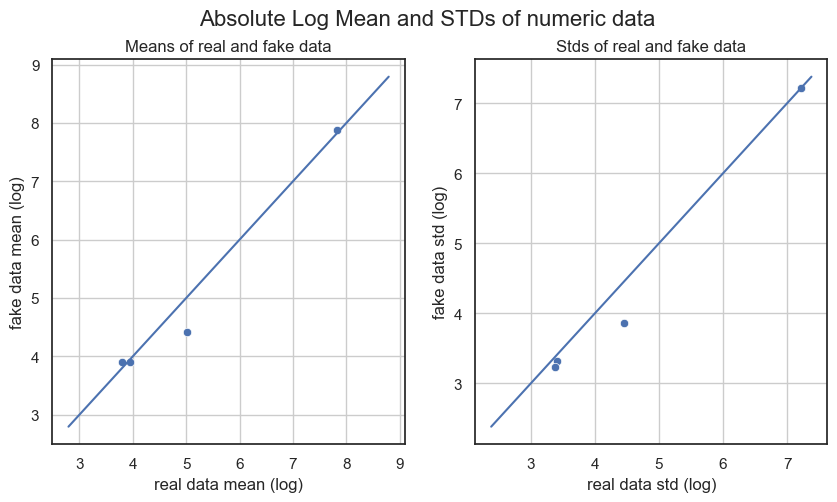

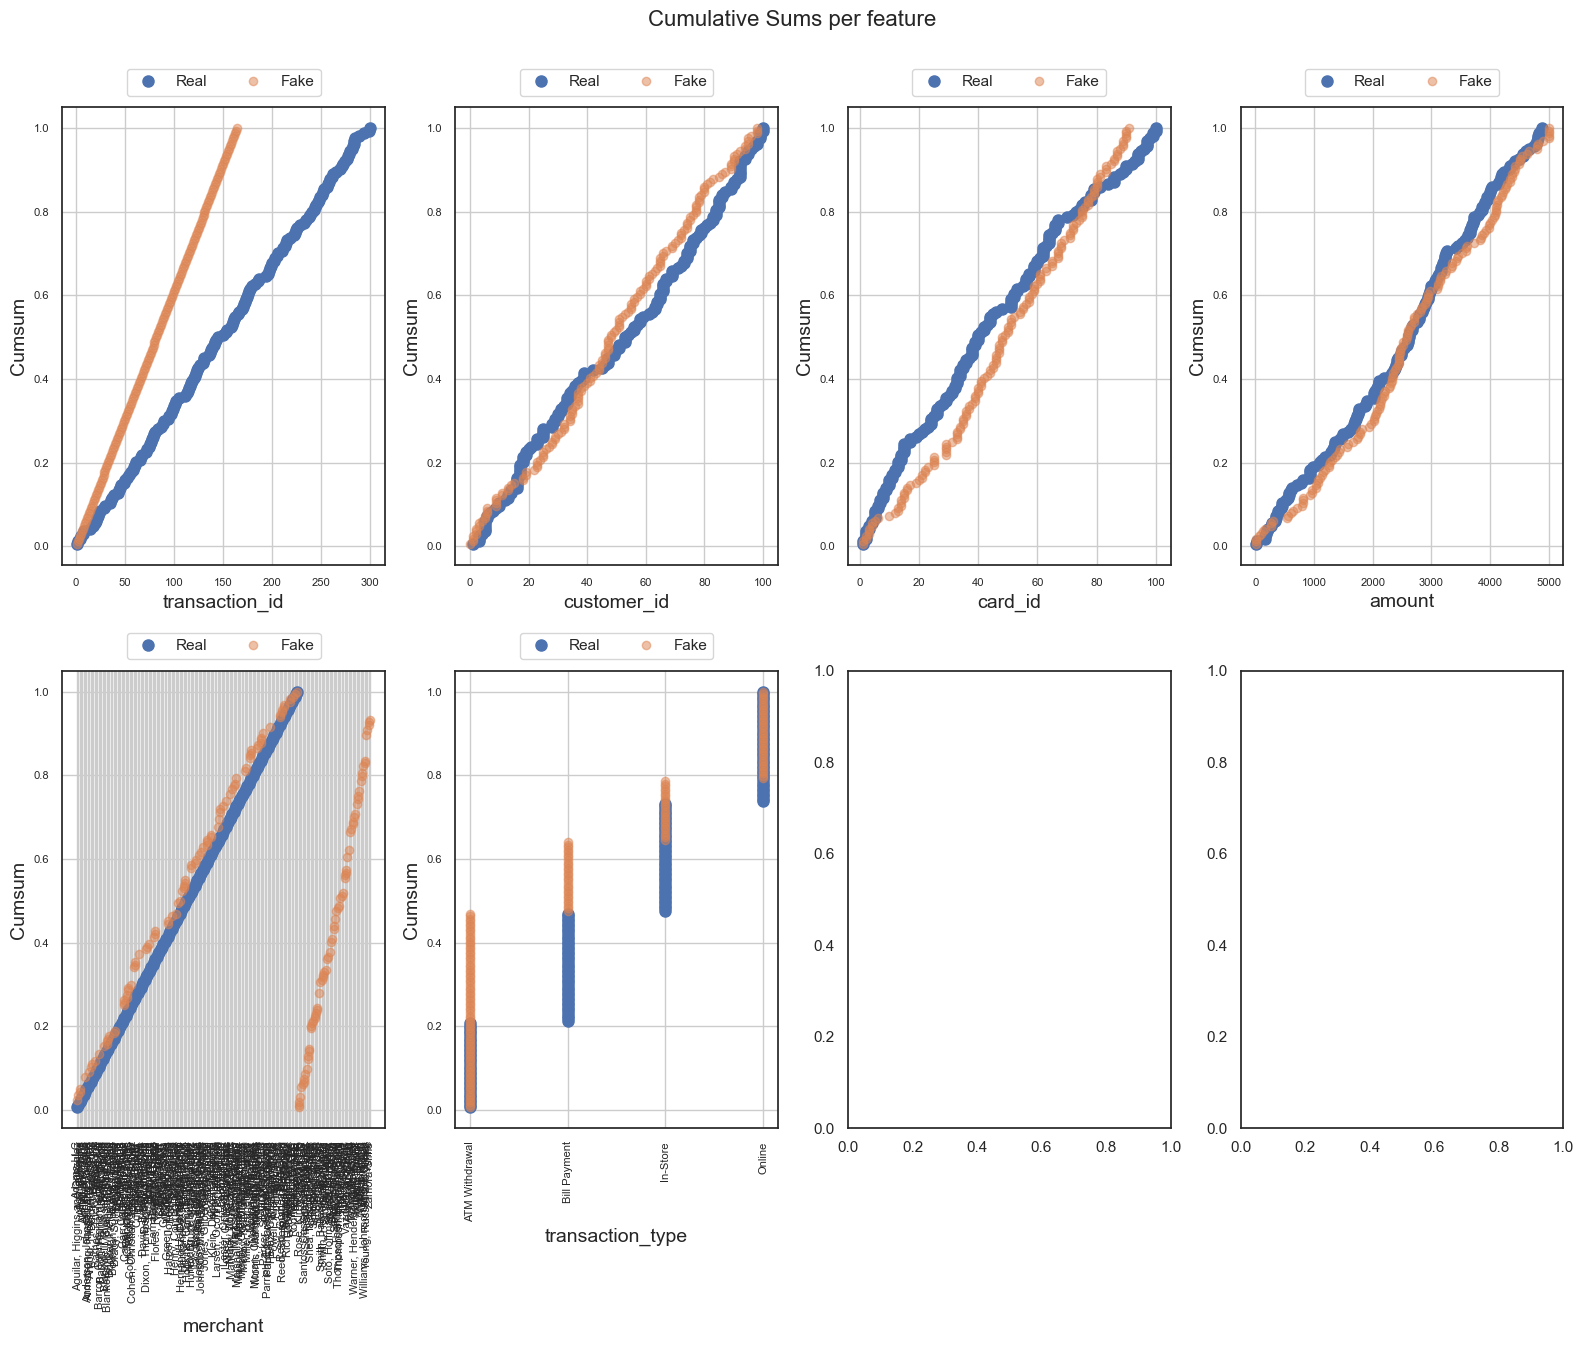

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


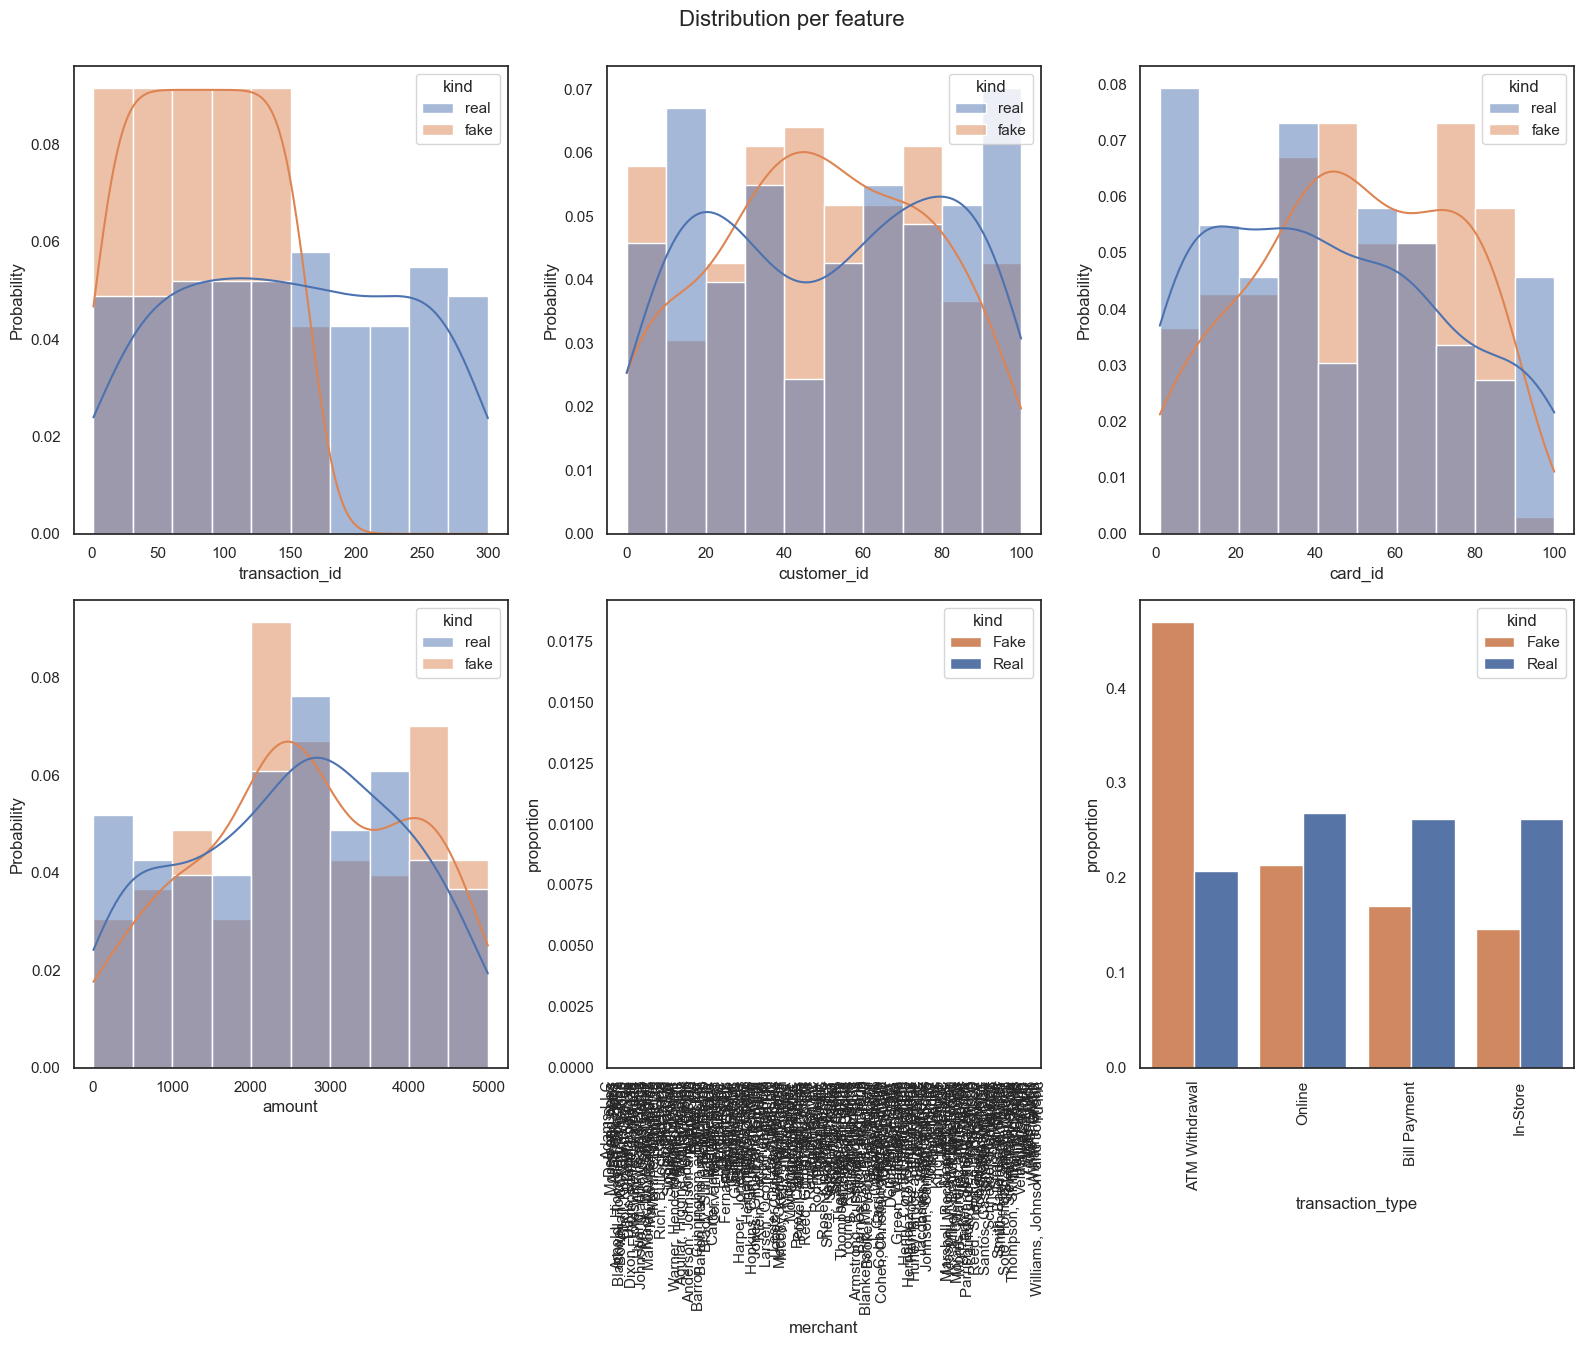

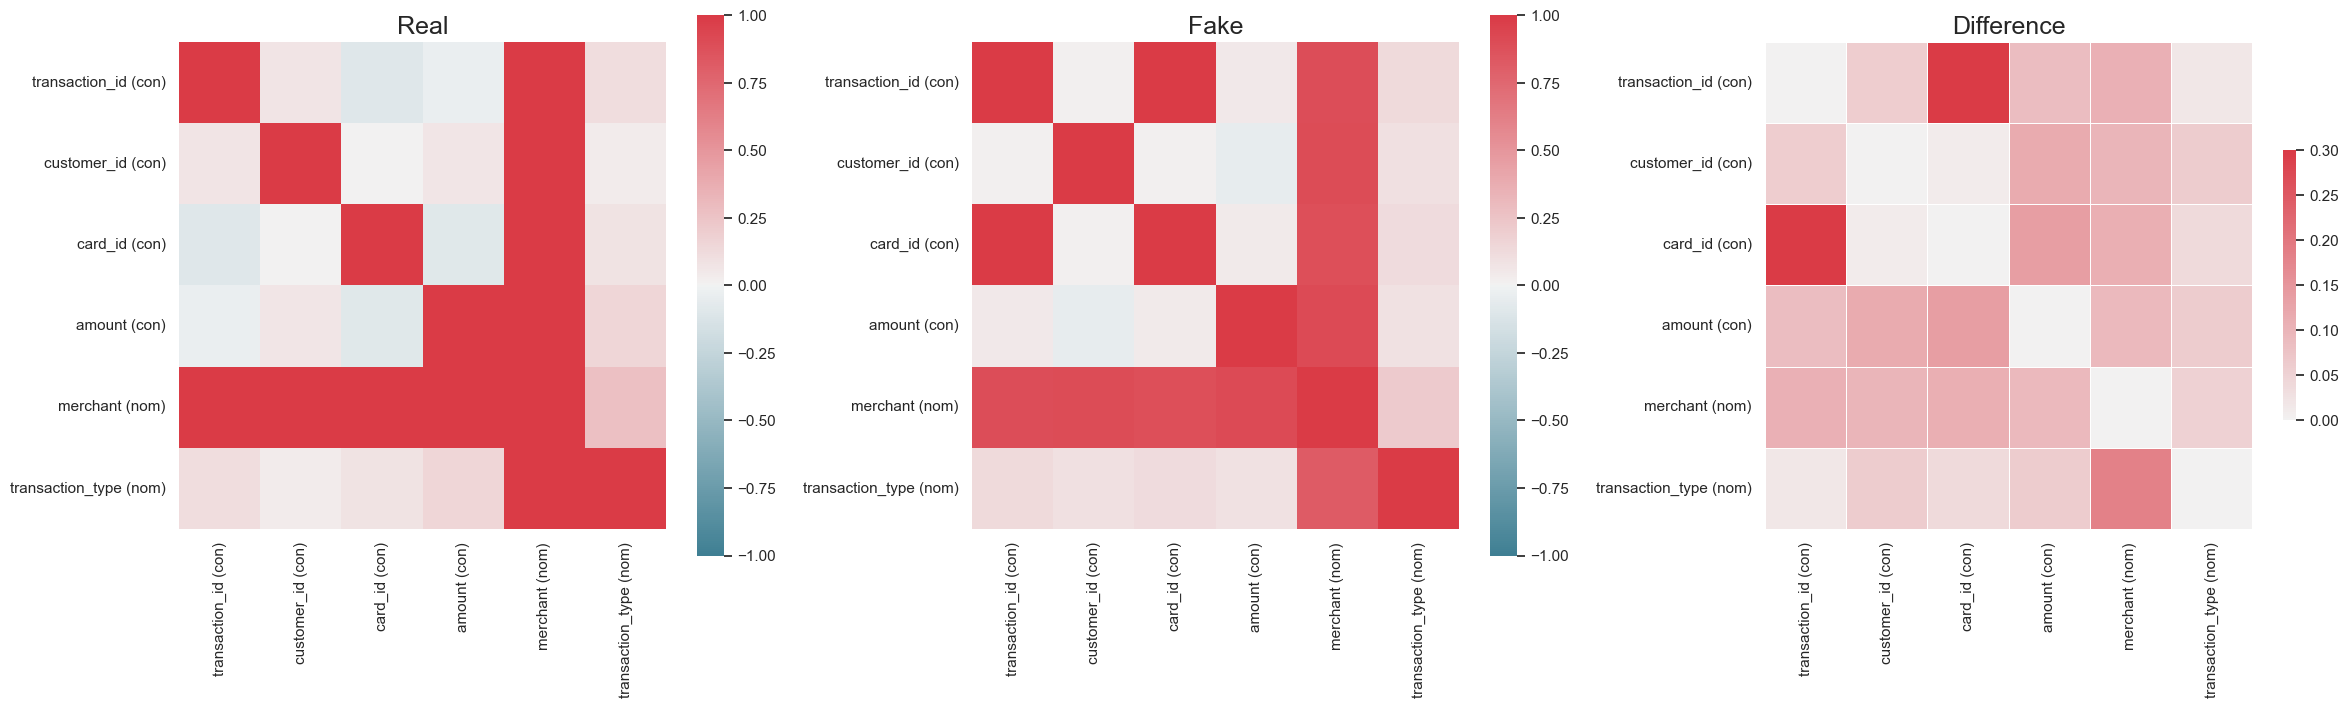

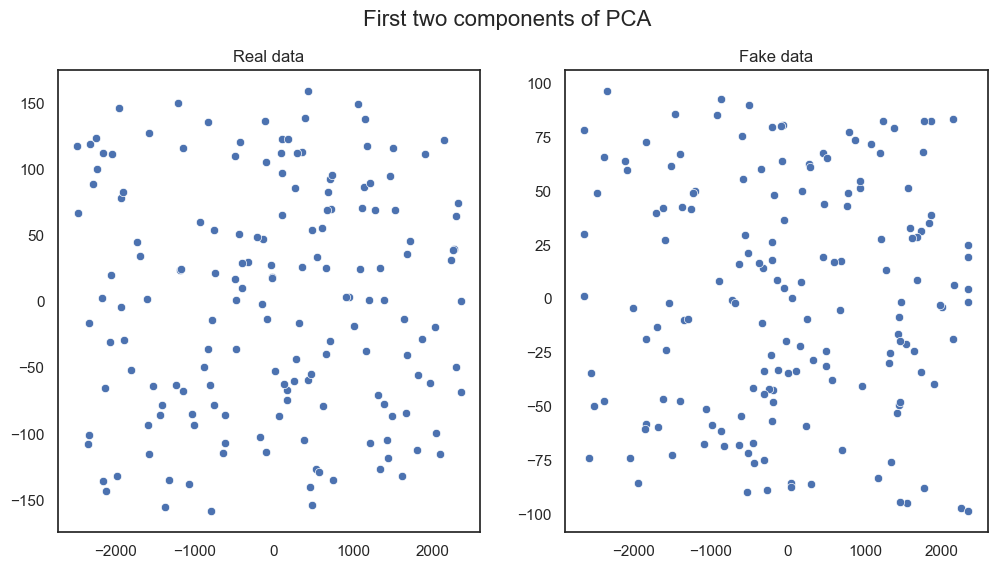

In [117]:
evaluate_synthetic_data(df_transactions, 
                        synthetic_data["transactions"], 
                        dataset_name="transactions")


--- Evaluating credit_cards ---

TableEvaluator Results:


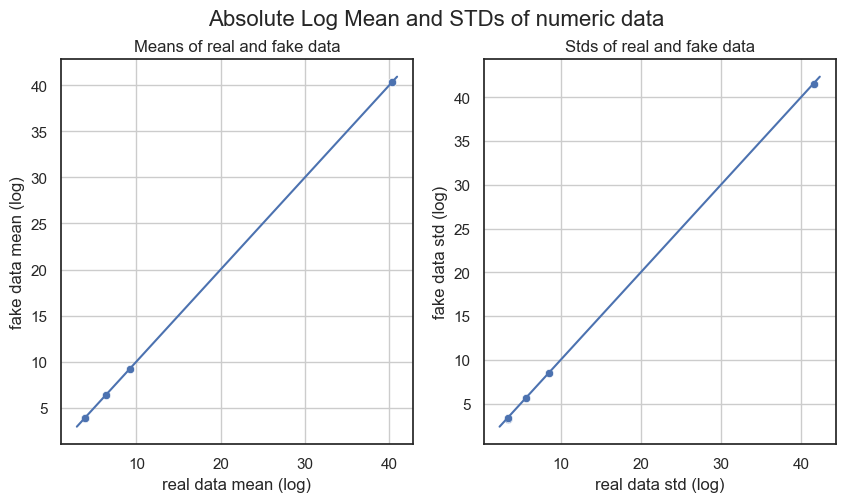

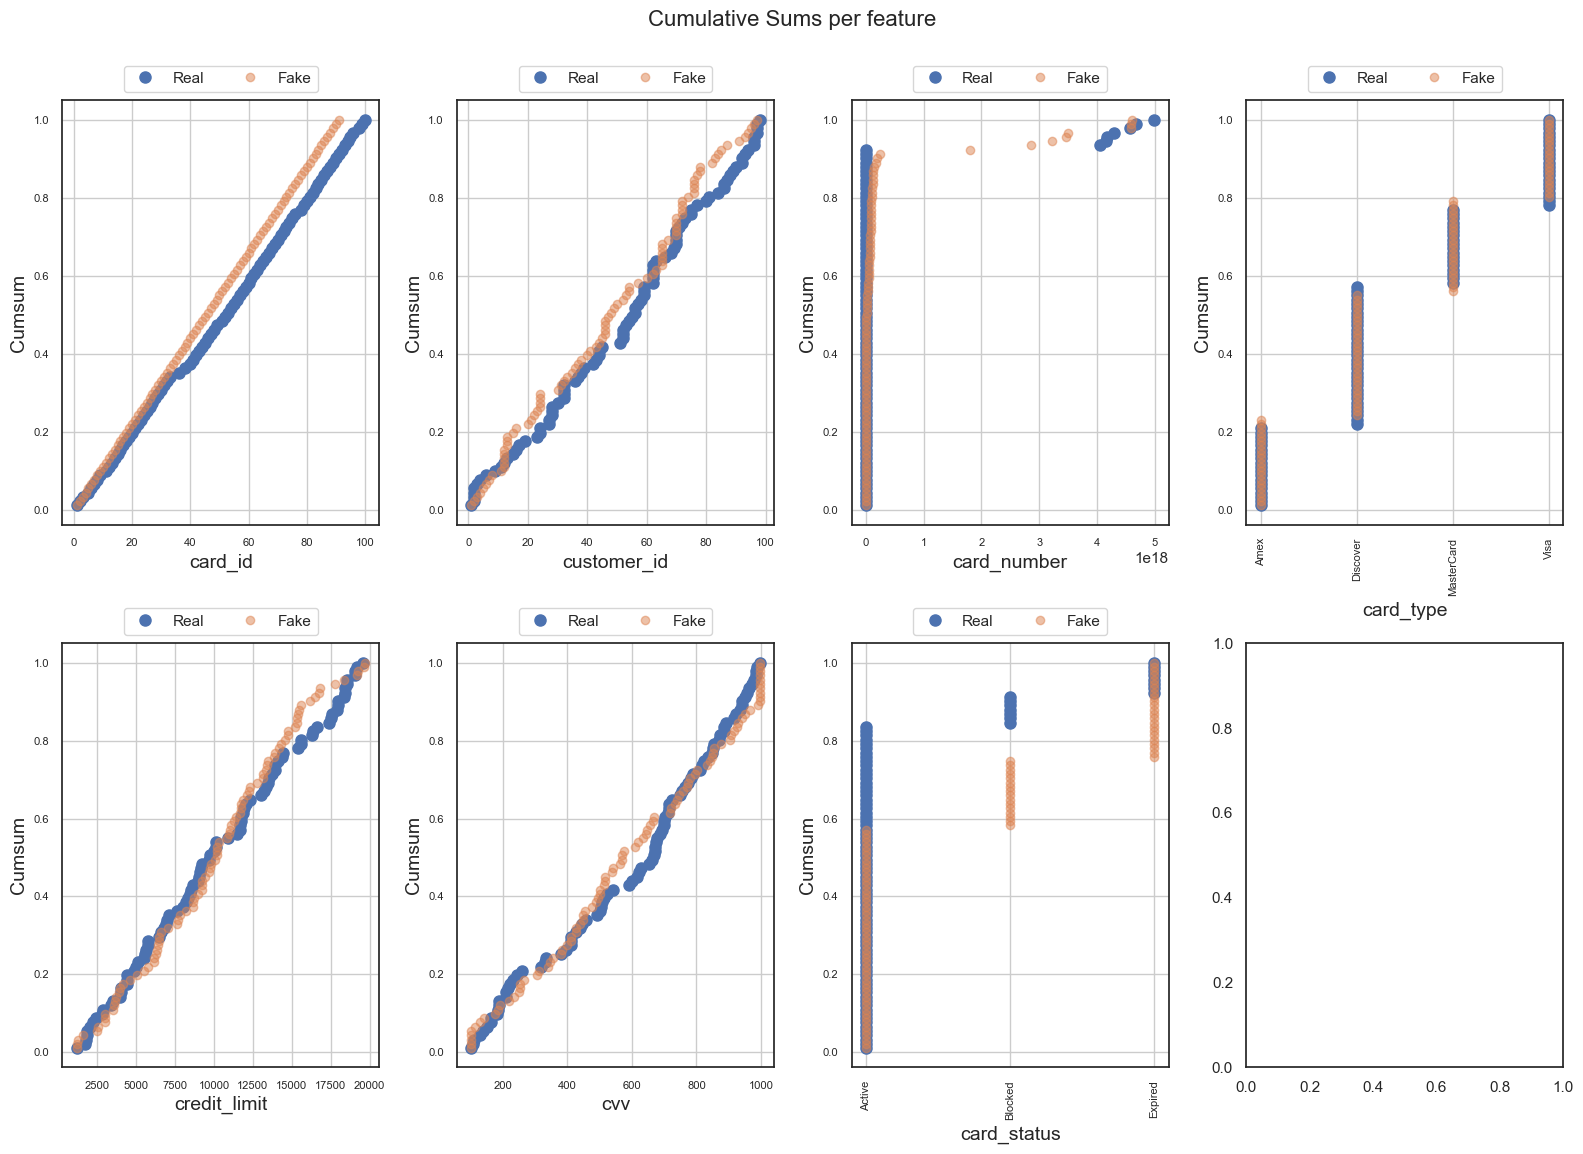

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


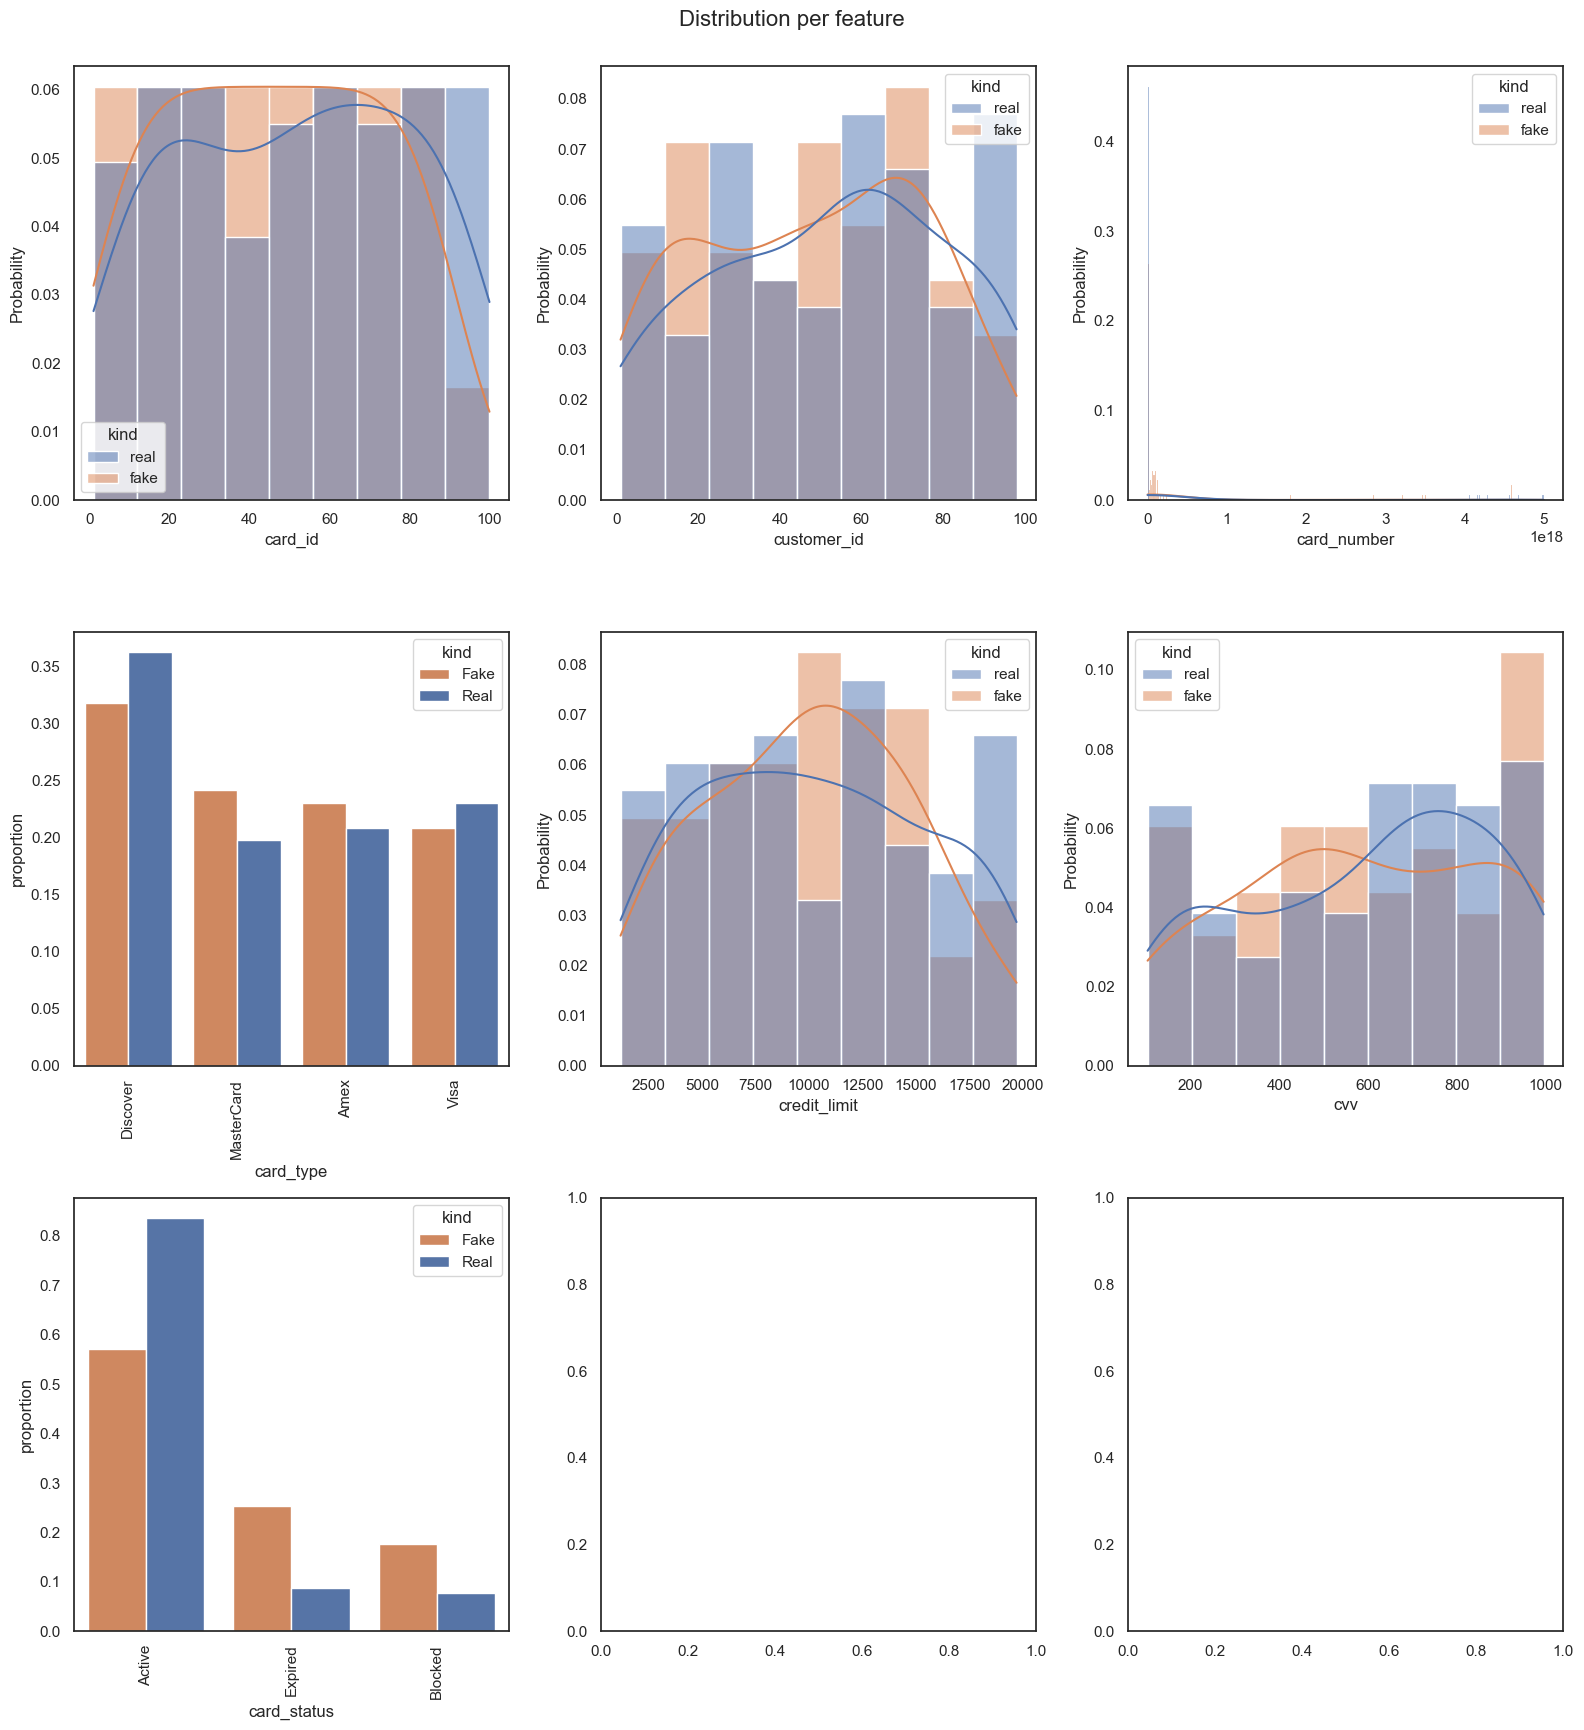

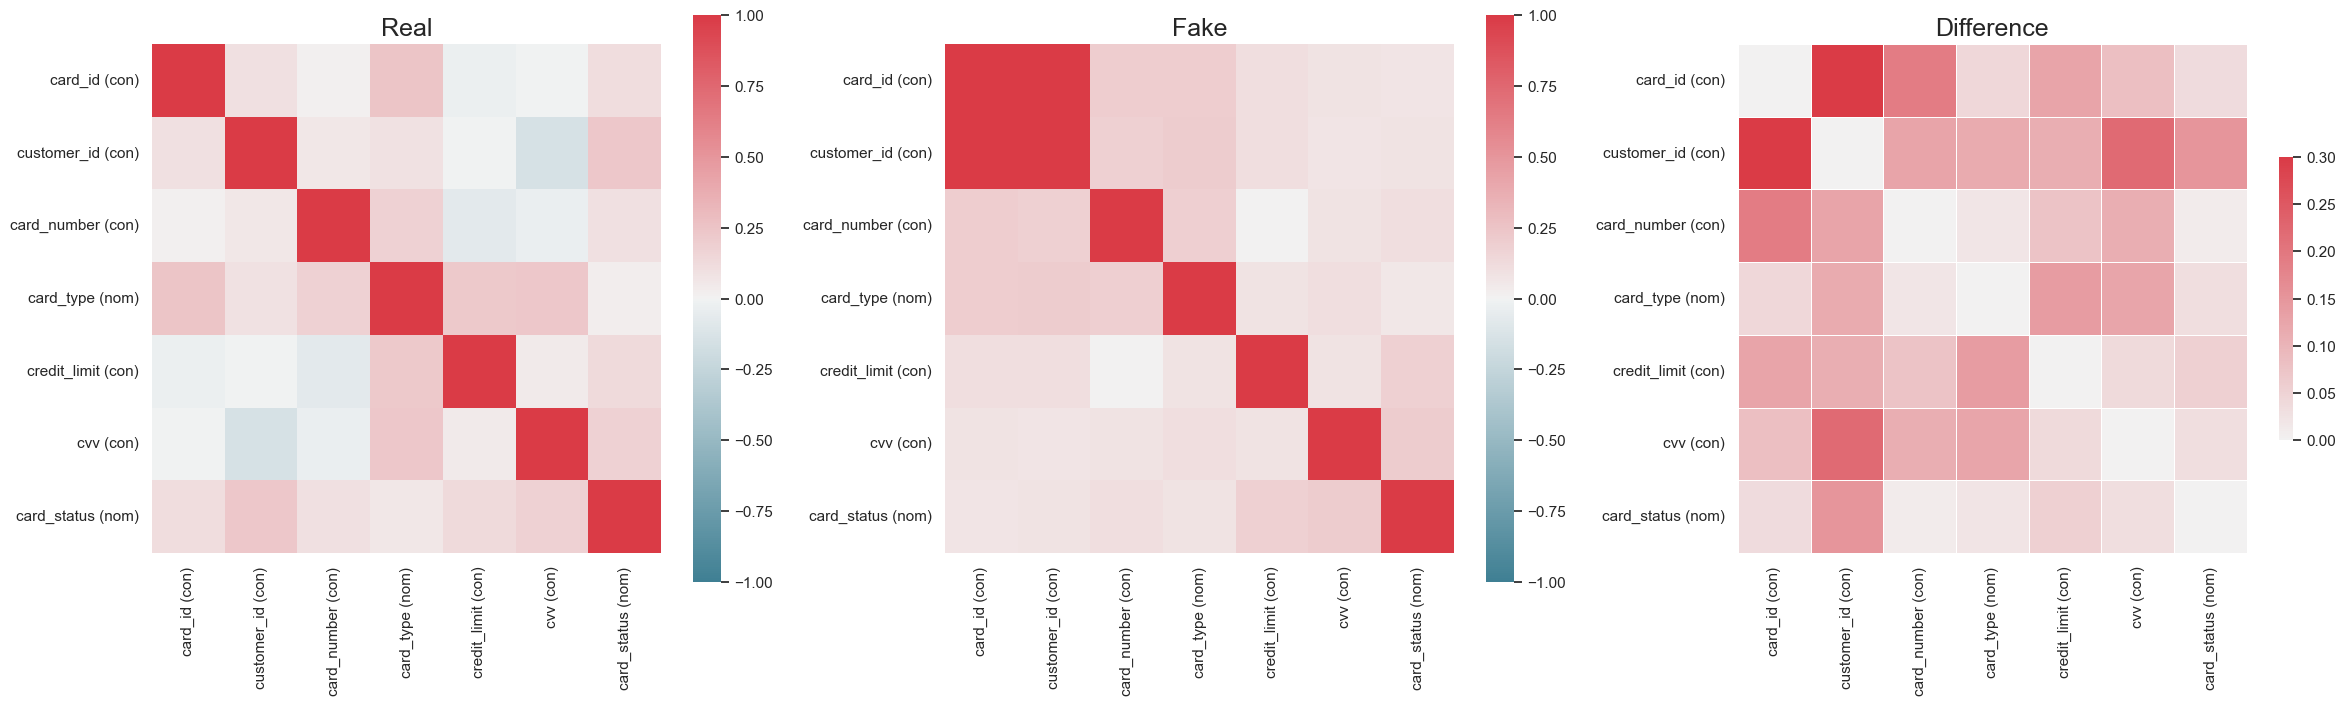

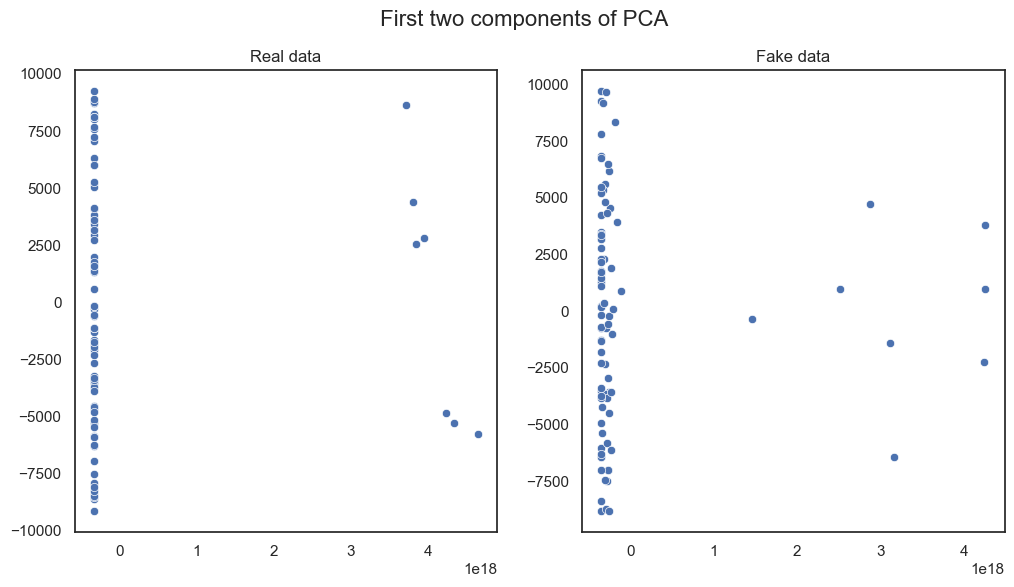

In [119]:
evaluate_synthetic_data(df_credit_cards, 
                        synthetic_data["credit_cards"], 
                        dataset_name="credit_cards")


--- Evaluating customer_demographics ---

TableEvaluator Results:


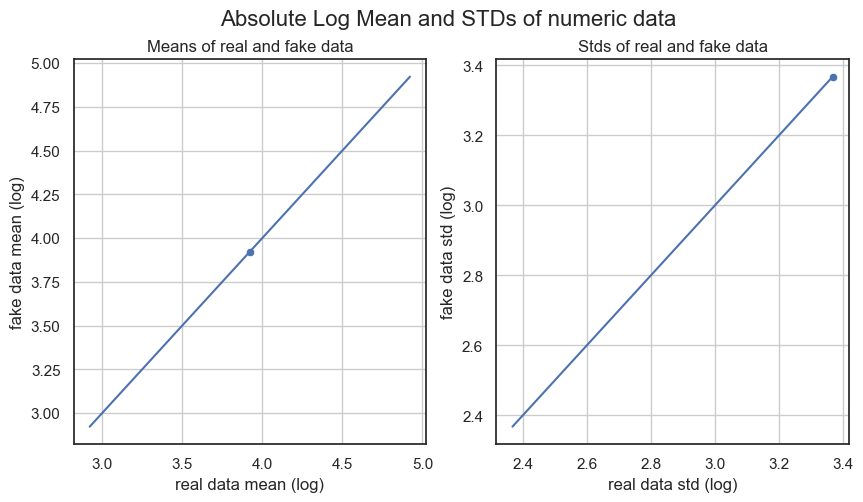

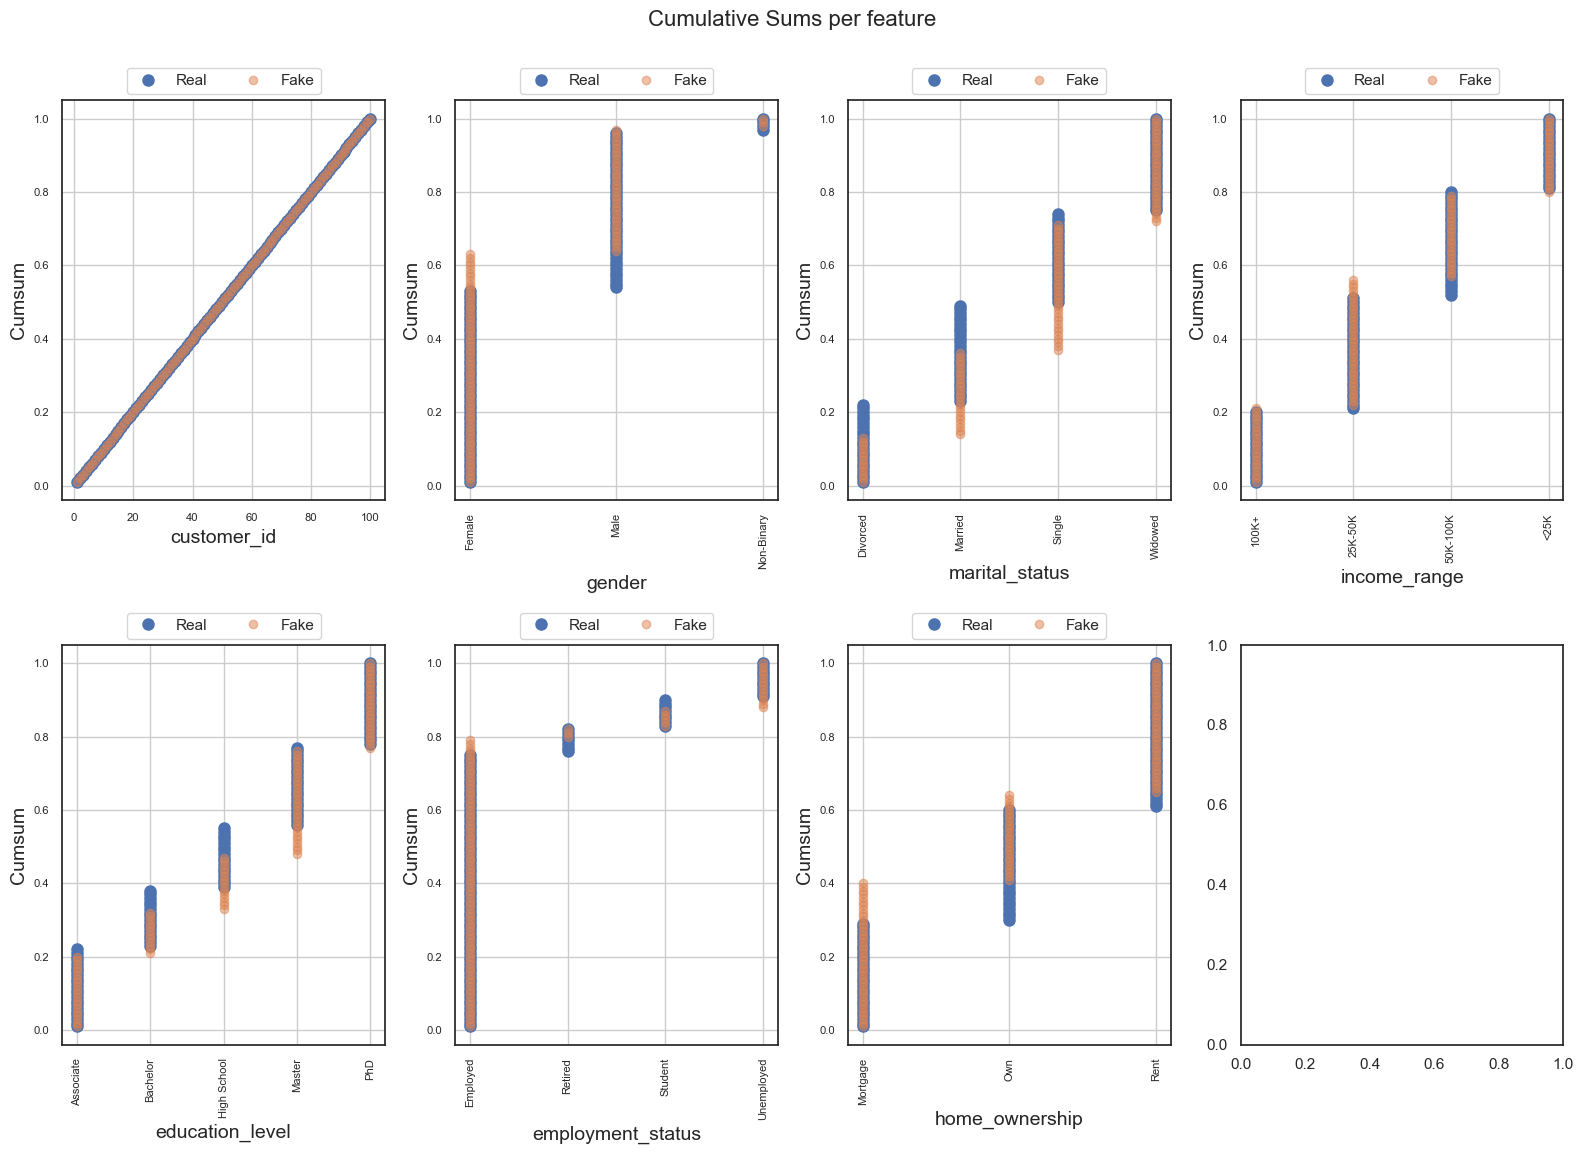

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number

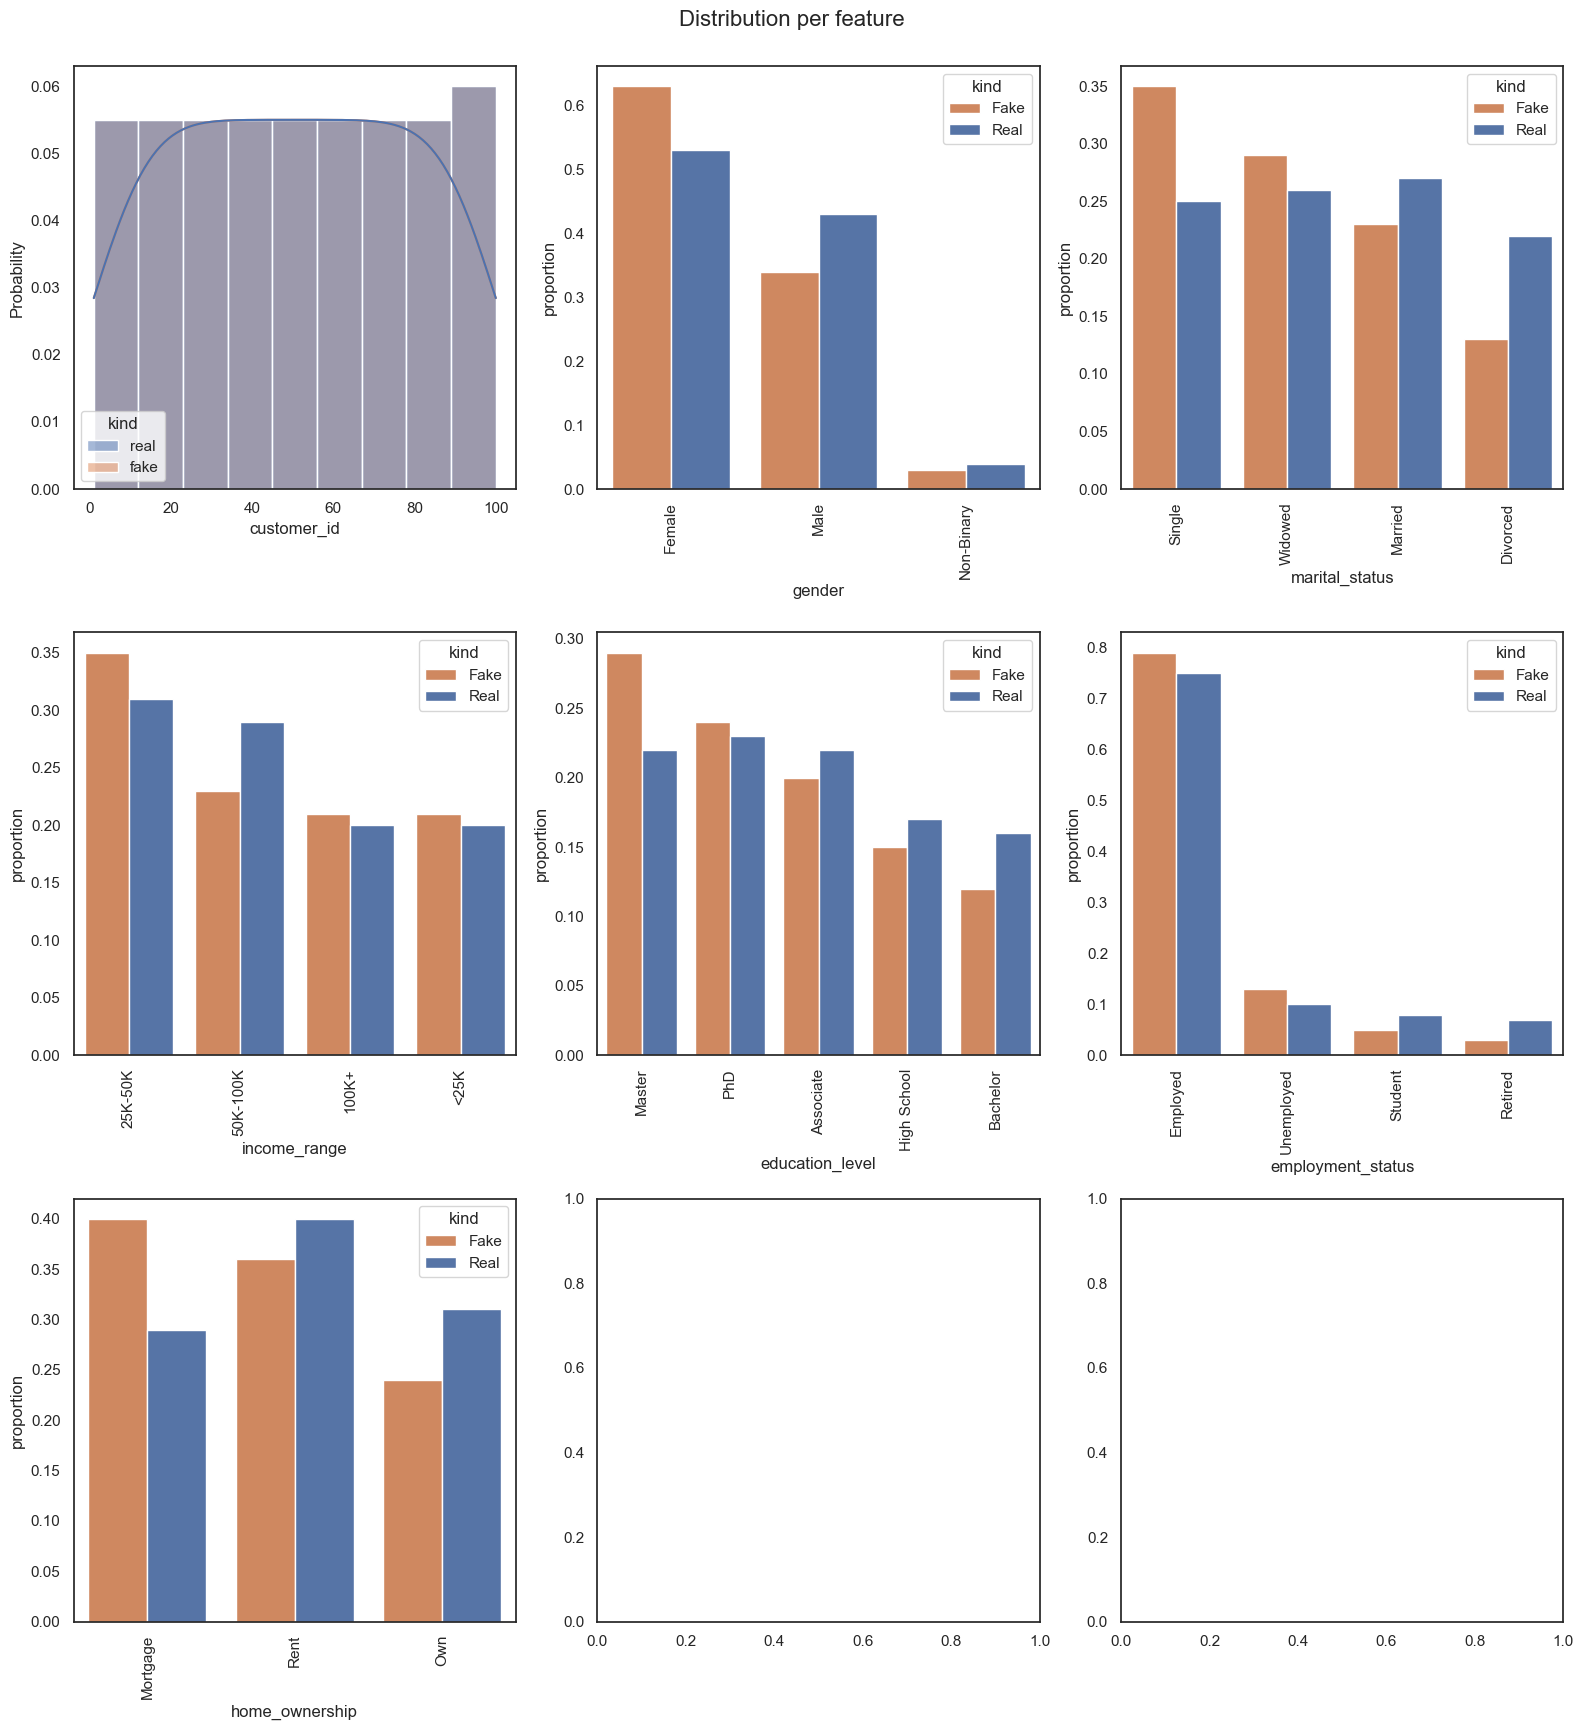

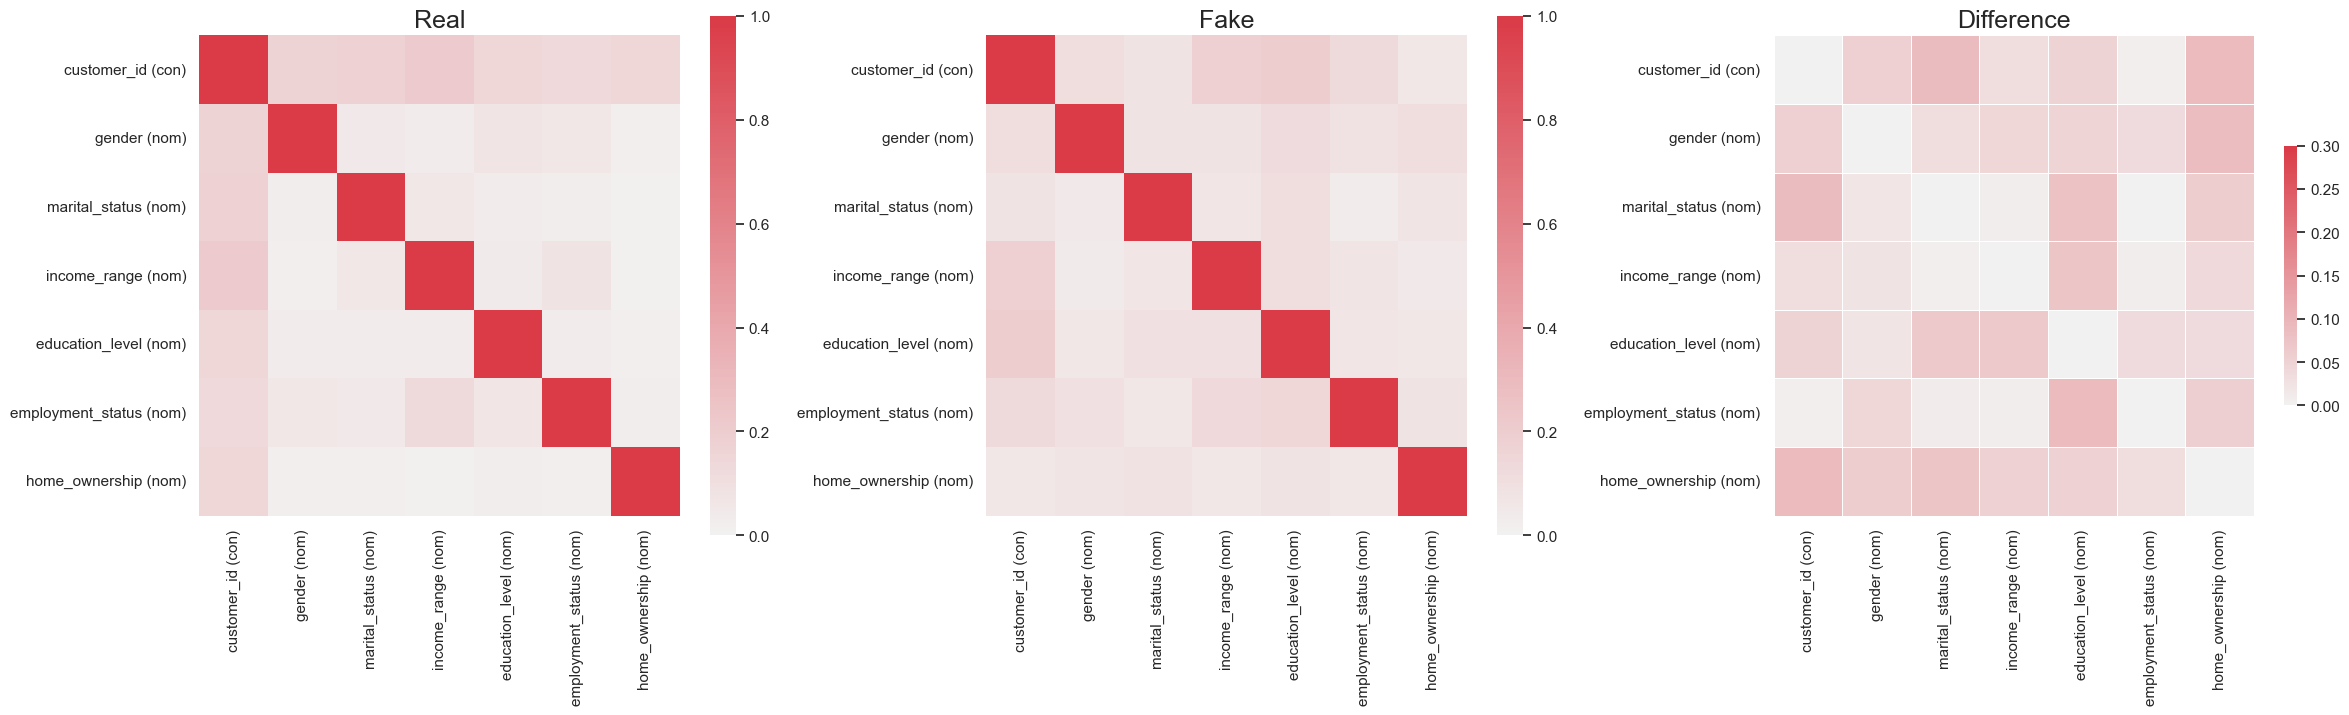

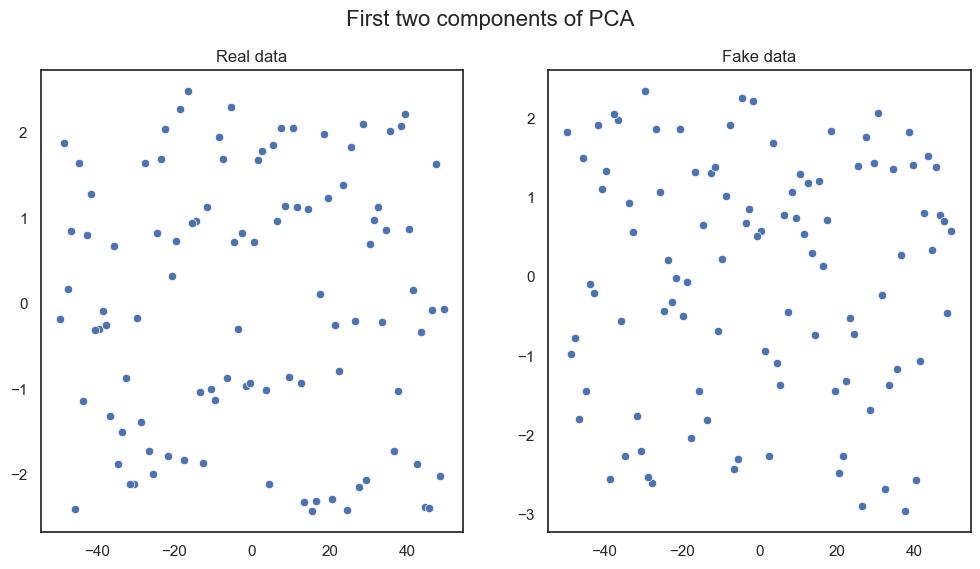

In [120]:
evaluate_synthetic_data(df_customer_demographics, 
                        synthetic_data["customer_demographics"], 
                        dataset_name="customer_demographics")


--- Evaluating customer_info ---

TableEvaluator Results:


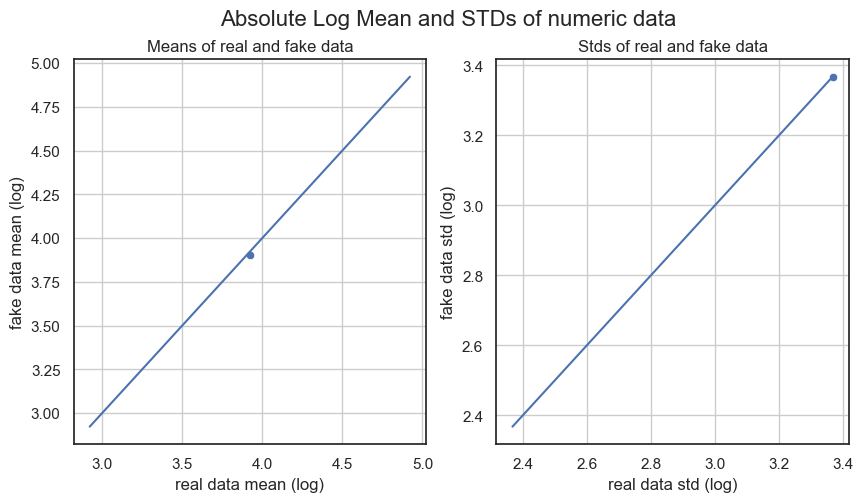

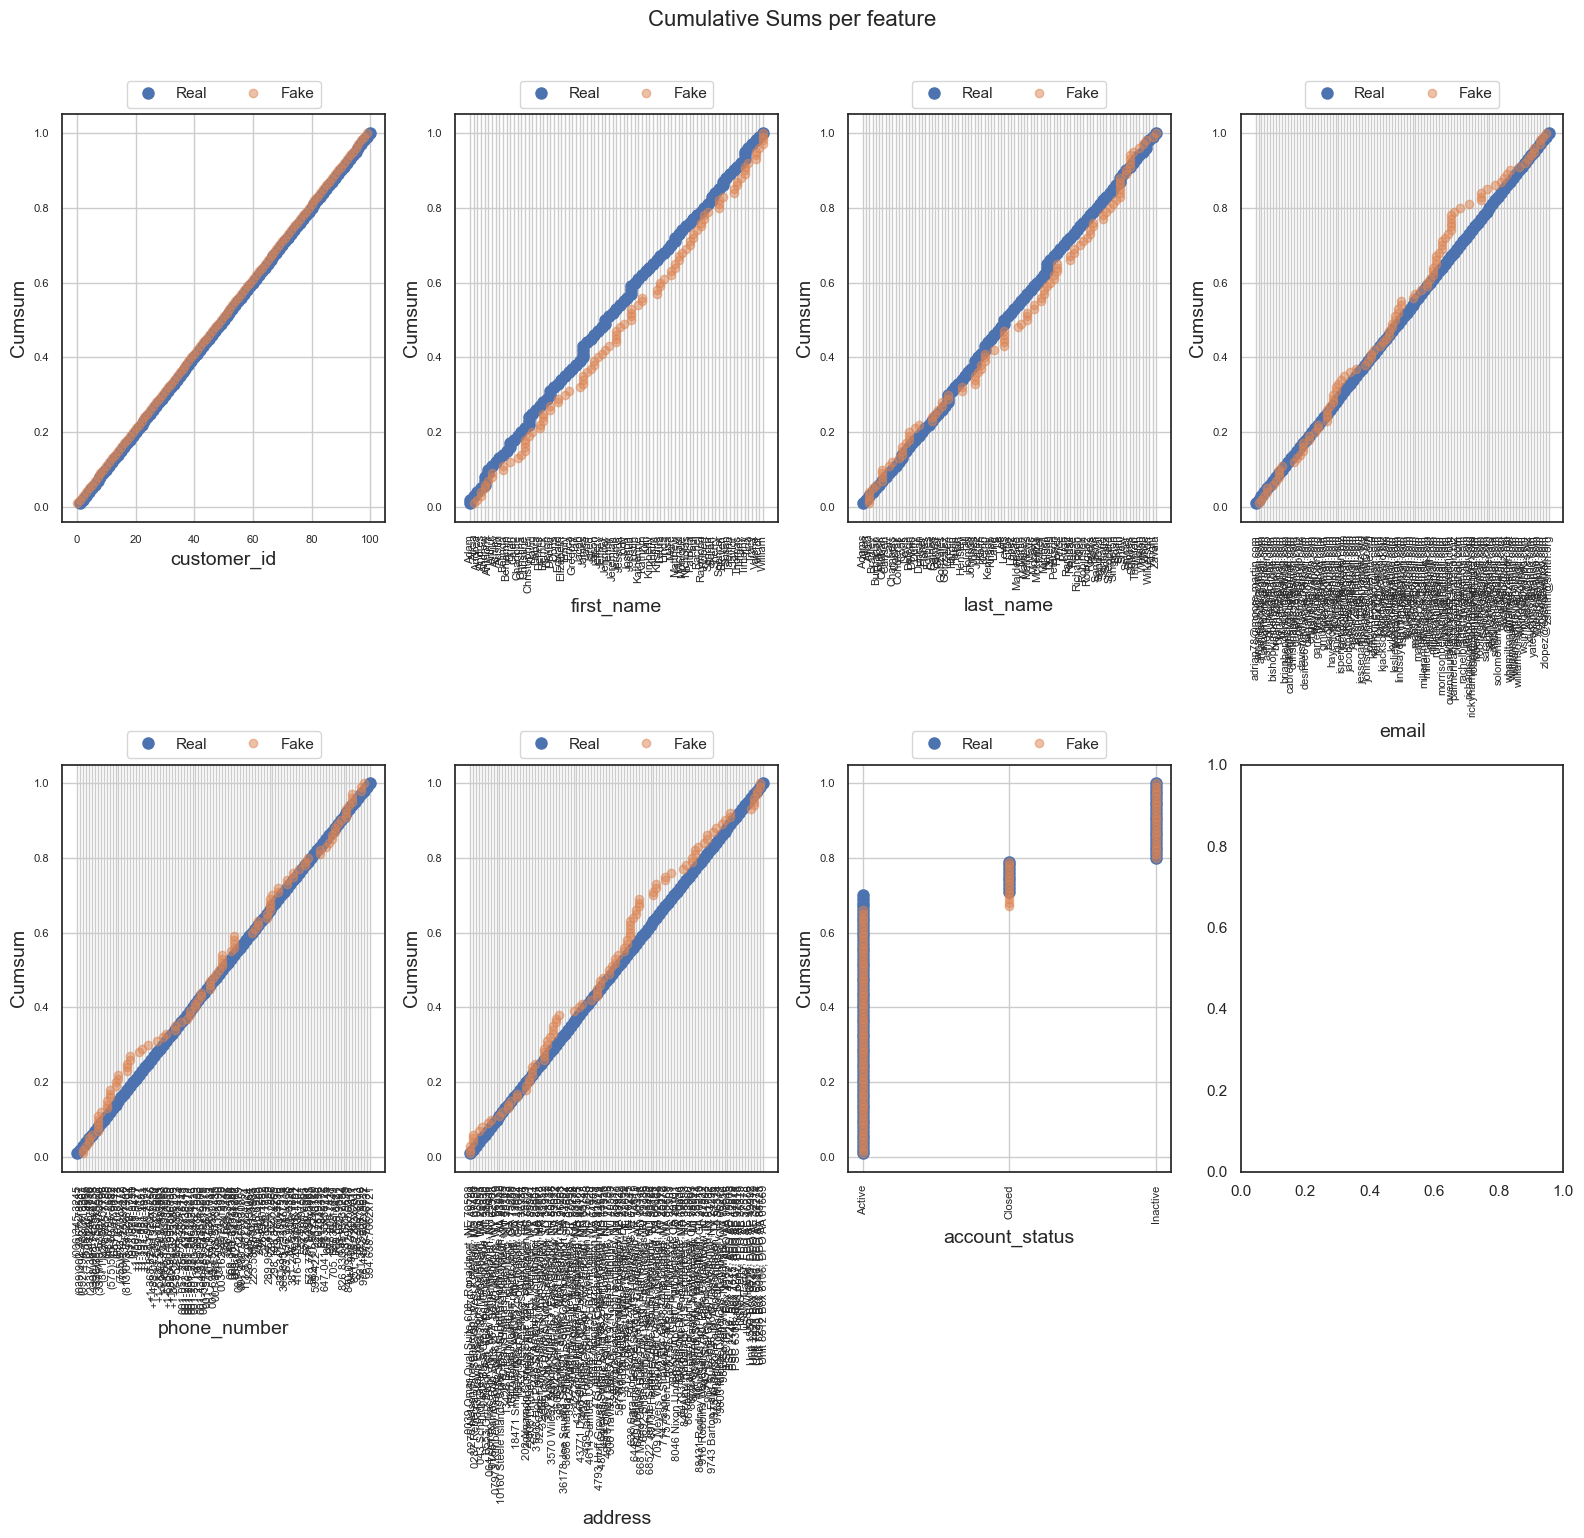

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/synthetic_data_generation_aiml_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number

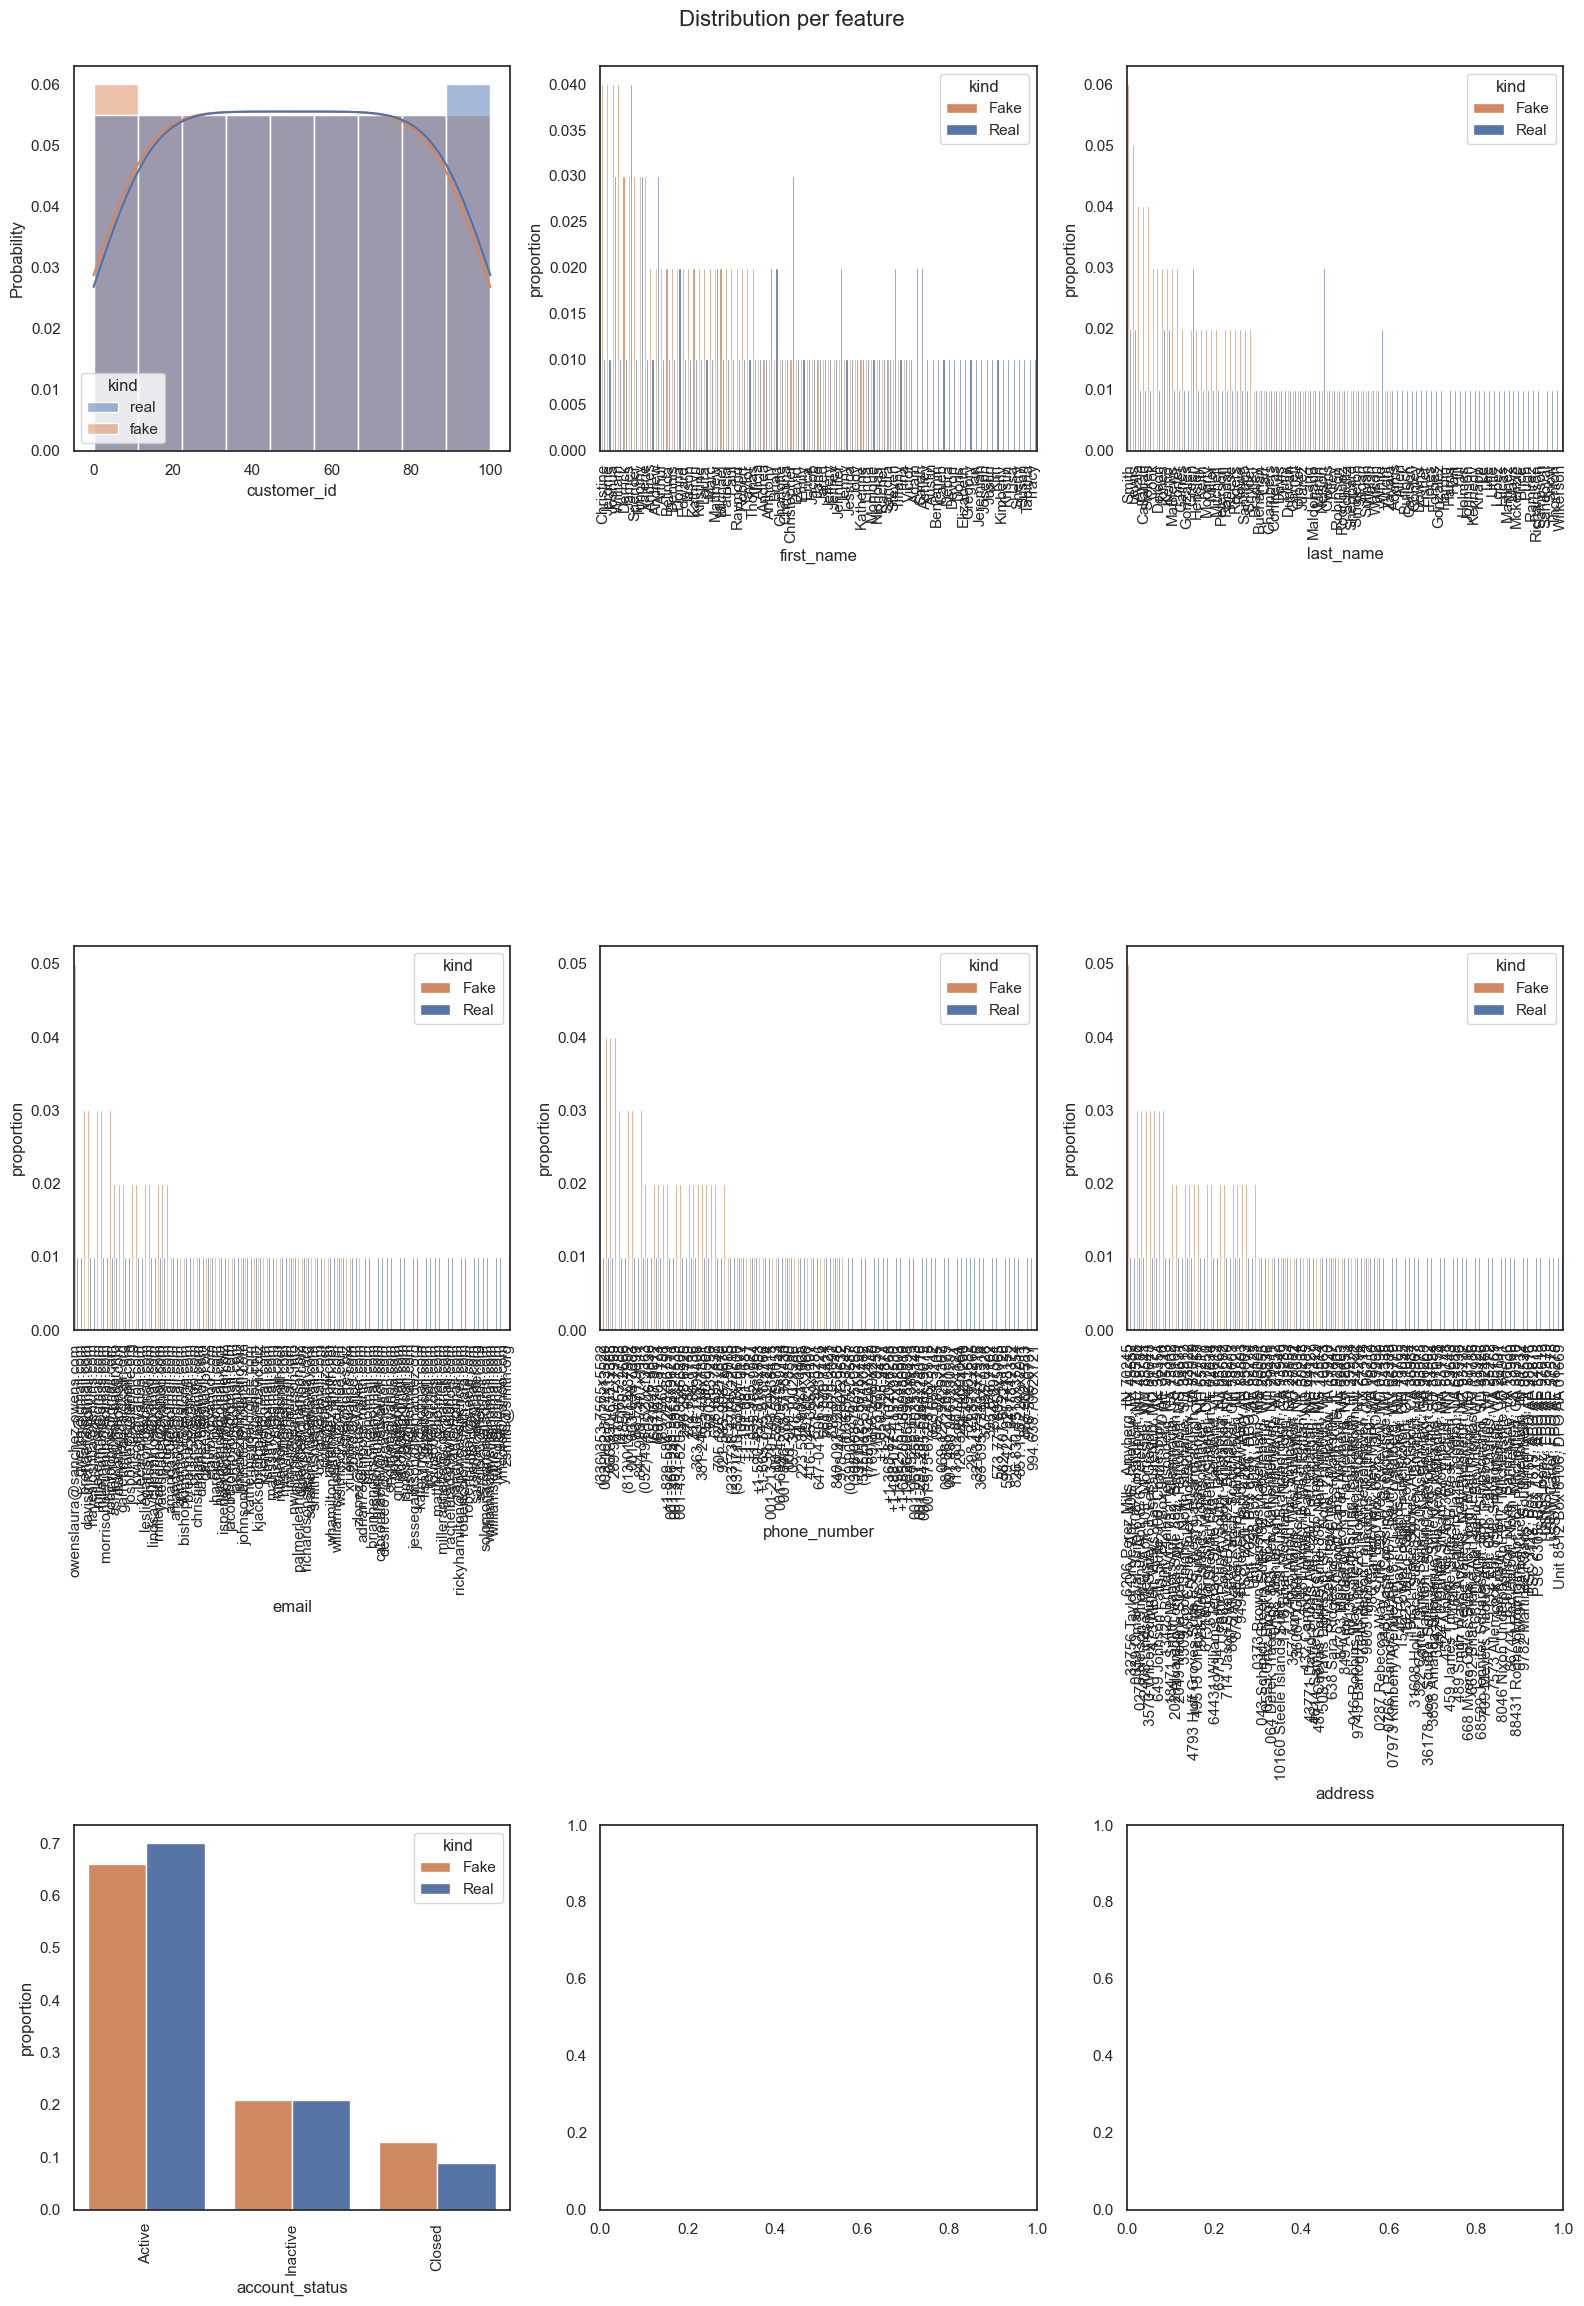

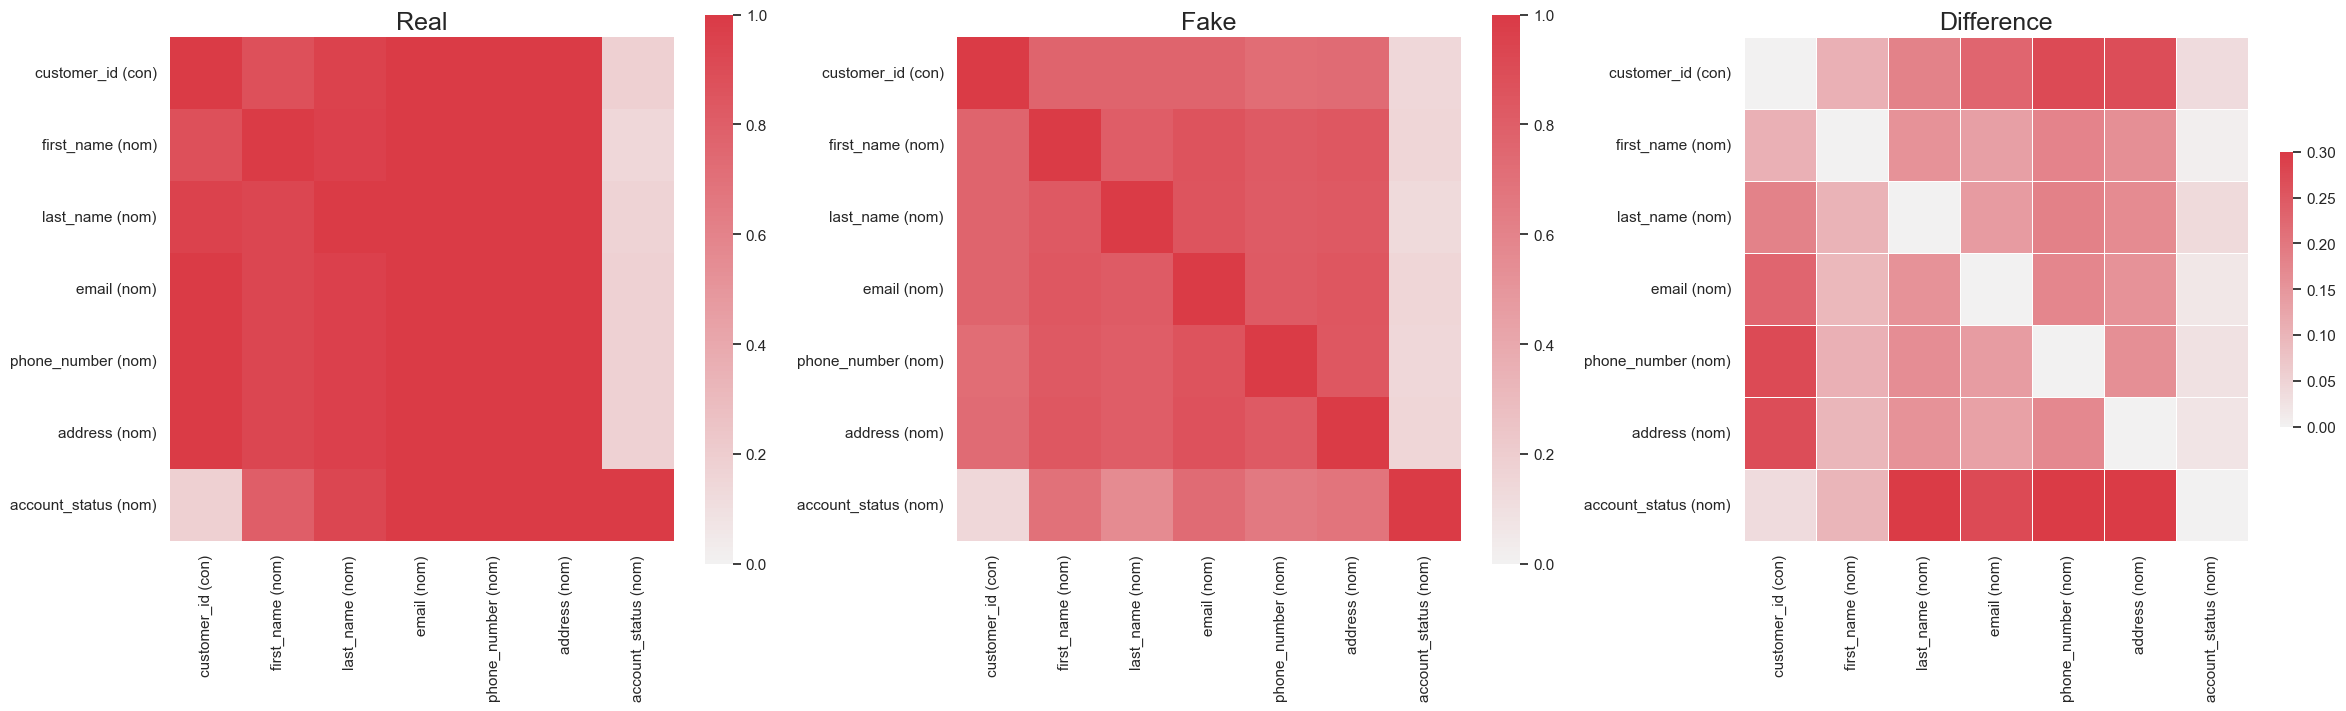

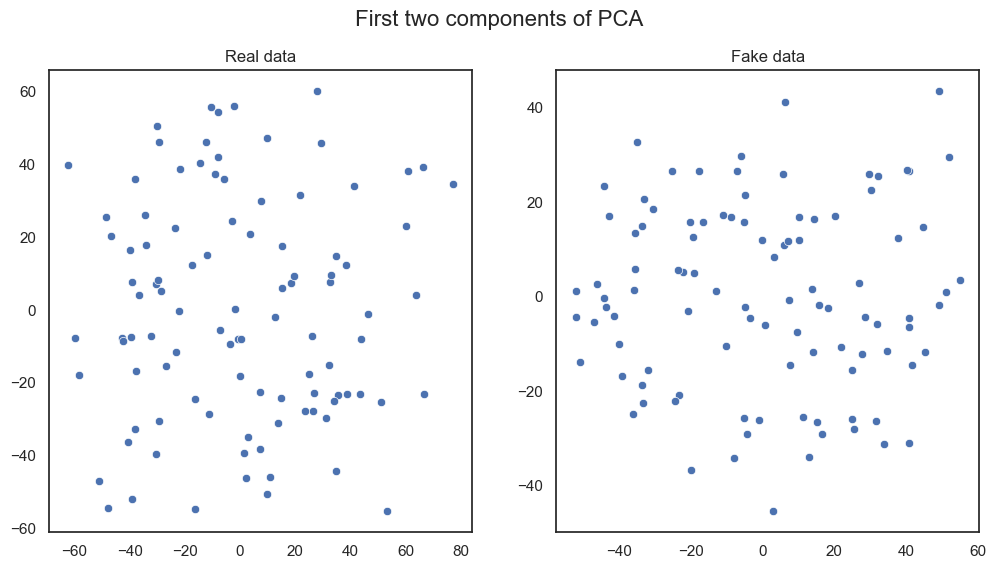

In [122]:
evaluate_synthetic_data(df_customers_info, 
                        synthetic_data["customers_info"], 
                        dataset_name="customer_info")

# Advance Analytics

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp, chi2_contingency
from scipy.spatial.distance import jensenshannon
from sklearn.neighbors import NearestNeighbors

In [37]:
class EvaluatorDict:
    def __init__(self, real_data, synthetic_data):
        """
        real_data & synthetic_data are dictionaries where:
        - Keys are table names
        - Values are pandas DataFrames
        """
        self.real_data = real_data
        self.synthetic_data = synthetic_data
    
    def detect_column_types(self, df):
        """Detect numerical and categorical columns"""
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def ks_test(self, real_df, synth_df, num_cols):
        """Perform KS test on numerical columns"""
        results = {}
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            results[col] = {'KS Statistic': stat, 'P-Value': p_value}
        return results

    def jensen_shannon_divergence(self, real_df, synth_df, cat_cols):
        """Compute JSD for categorical columns"""
        results = {}
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            # Align distributions
            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            results[col] = {'JSD': jsd}
        return results

    def correlation_comparison(self, real_df, synth_df, num_cols):
        """Compare correlation matrices"""
        real_corr = real_df[num_cols].corr()
        synth_corr = synth_df[num_cols].corr()
        diff = np.abs(real_corr - synth_corr).mean().mean()  # Mean absolute difference
        return {'Correlation Difference': diff}

    def foreign_key_check(self):
        """Ensure foreign key relationships are preserved"""
        results = {}
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results['transactions → customers_info'] = f"{len(missing_customers)} missing references"
            
            if table == "credit_cards":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results['credit_cards → customers_info'] = f"{len(missing_customers)} missing references"

        return results

    def customer_card_ratio(self):
        """Check if customer-card distribution is similar"""
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        return {'Customer-Card Ratio Difference': diff}

    def knn_privacy_check(self, num_cols, k=5):
        """Check privacy leakage using Nearest Neighbors"""
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)
        return {'Nearest Neighbor Distance': avg_distance}

    def evaluate(self):
        """Run all evaluations"""
        results = {}
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results[table] = {
                "KS Test (Numerical)": self.ks_test(real_df, synth_df, num_cols),
                "JSD (Categorical)": self.jensen_shannon_divergence(real_df, synth_df, cat_cols),
                "Correlation Difference": self.correlation_comparison(real_df, synth_df, num_cols)
            }
        
        # Add inter-table checks
        results["Foreign Key Check"] = self.foreign_key_check()
        results["Customer-Card Ratio"] = self.customer_card_ratio()
        results["Privacy Check"] = self.knn_privacy_check(num_cols)

        return results

In [40]:
class Evaluator:
    def __init__(self, real_data, synthetic_data):
        """
        real_data & synthetic_data are dictionaries where:
        - Keys are table names
        - Values are pandas DataFrames
        """
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        """Detect numerical and categorical columns"""
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def ks_test(self, table_name, real_df, synth_df, num_cols):
        """Perform KS test on numerical columns"""
        results = []
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            results.append(["KS Test", table_name, col, "Numerical", stat, p_value])
        return results

    def jensen_shannon_divergence(self, table_name, real_df, synth_df, cat_cols):
        """Compute JSD for categorical columns"""
        results = []
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            # Align distributions
            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            results.append(["JSD", table_name, col, "Categorical", jsd, None])  # No p-value for JSD
        return results

    def correlation_comparison(self, table_name, real_df, synth_df, num_cols):
        """Compare correlation matrices"""
        real_corr = real_df[num_cols].corr()
        synth_corr = synth_df[num_cols].corr()
        diff = np.abs(real_corr - synth_corr).mean().mean()  # Mean absolute difference
        return [["Correlation Difference", table_name, "All", "Numerical", diff, None]]

    def foreign_key_check(self):
        """Ensure foreign key relationships are preserved"""
        results = []
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None])
            
            if table == "credit_cards":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None])

        return results

    def customer_card_ratio(self):
        """Check if customer-card distribution is similar"""
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        return [["Customer-Card Ratio", "credit_cards", "customer_id", "Categorical", diff, None]]

    def knn_privacy_check(self, num_cols, k=5):
        """Check privacy leakage using Nearest Neighbors"""
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)
        return [["Nearest Neighbor Distance", "All Tables", "All", "Numerical", avg_distance, None]]

    def evaluate(self):
        """Run all evaluations and return as a DataFrame"""
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.ks_test(table, real_df, synth_df, num_cols))
            results.extend(self.jensen_shannon_divergence(table, real_df, synth_df, cat_cols))
            results.extend(self.correlation_comparison(table, real_df, synth_df, num_cols))
        
        # Add inter-table checks
        results.extend(self.foreign_key_check())
        results.extend(self.customer_card_ratio())
        results.extend(self.knn_privacy_check(num_cols))

        # Convert to DataFrame
        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value"])
        return df_results


In [36]:
class StatsEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def categorize_evaluation(self, metric, value, p_value):
        """Categorizes metric results as Good, Average, or Bad"""
        if metric in ["KS Test", "Transaction Amount Per Customer", "Joint Distribution Check"]:
            if value > 0.2:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "JSD":
            if value > 0.3:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "Foreign Key Check":
            if value > 0.05:
                return "Bad"
            elif value > 0.01:
                return "Average"
            else:
                return "Good"

        elif metric == "Customer-Card Ratio":
            if value > 0.2:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "Nearest Neighbor Distance":
            if value > 0.5:
                return "Bad"
            elif value > 0.2:
                return "Average"
            else:
                return "Good"

        return "Unknown"

    def ks_test(self, table_name, real_df, synth_df, num_cols):
        results = []
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            evaluation = self.categorize_evaluation("KS Test", stat, p_value)
            results.append(["KS Test", table_name, col, "Numerical", stat, p_value, evaluation])
        return results

    def jensen_shannon_divergence(self, table_name, real_df, synth_df, cat_cols):
        results = []
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            evaluation = self.categorize_evaluation("JSD", jsd, None)
            results.append(["JSD", table_name, col, "Categorical", jsd, None, evaluation])
        return results

    def foreign_key_check(self):
        results = []
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                eval_result = self.categorize_evaluation("Foreign Key Check", len(missing_customers) / len(df), None)
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None, eval_result])

        return results

    def customer_card_ratio(self):
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        eval_result = self.categorize_evaluation("Customer-Card Ratio", diff, None)
        return [["Customer-Card Ratio", "credit_cards", "customer_id", "Categorical", diff, None, eval_result]]

    def transaction_amount_per_customer(self):
        real_trans = self.real_data['transactions'].groupby('customer_id')['amount'].sum()
        synth_trans = self.synthetic_data['transactions'].groupby('customer_id')['amount'].sum()

        stat, p_value = ks_2samp(real_trans, synth_trans)
        eval_result = self.categorize_evaluation("Transaction Amount Per Customer", stat, p_value)
        return [["Transaction Amount Per Customer", "transactions", "customer_id", "Numerical", stat, p_value, eval_result]]

    def joint_distribution_check(self):
        real_jd = self.real_data['transactions'][['customer_id', 'amount']]
        synth_jd = self.synthetic_data['transactions'][['customer_id', 'amount']]

        real_dist = real_jd.groupby('customer_id')['amount'].mean()
        synth_dist = synth_jd.groupby('customer_id')['amount'].mean()

        stat, p_value = ks_2samp(real_dist, synth_dist)
        eval_result = self.categorize_evaluation("Joint Distribution Check", stat, p_value)
        return [["Joint Distribution Check", "transactions", "customer_id-amount", "Numerical", stat, p_value, eval_result]]

    def knn_privacy_check(self, num_cols, k=5):
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)

        eval_result = self.categorize_evaluation("Nearest Neighbor Distance", avg_distance, None)
        return [["Nearest Neighbor Distance", "All Tables", "All", "Numerical", avg_distance, None, eval_result]]

    def evaluate(self):
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.ks_test(table, real_df, synth_df, num_cols))
            results.extend(self.jensen_shannon_divergence(table, real_df, synth_df, cat_cols))

        results.extend(self.foreign_key_check())
        results.extend(self.customer_card_ratio())
        results.extend(self.transaction_amount_per_customer())
        results.extend(self.joint_distribution_check())
        results.extend(self.knn_privacy_check(num_cols))

        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value", "Evaluation"])
        return df_results


![Screenshot 2025-02-11 at 9.29.20 AM.png](<attachment:Screenshot 2025-02-11 at 9.29.20 AM.png>)
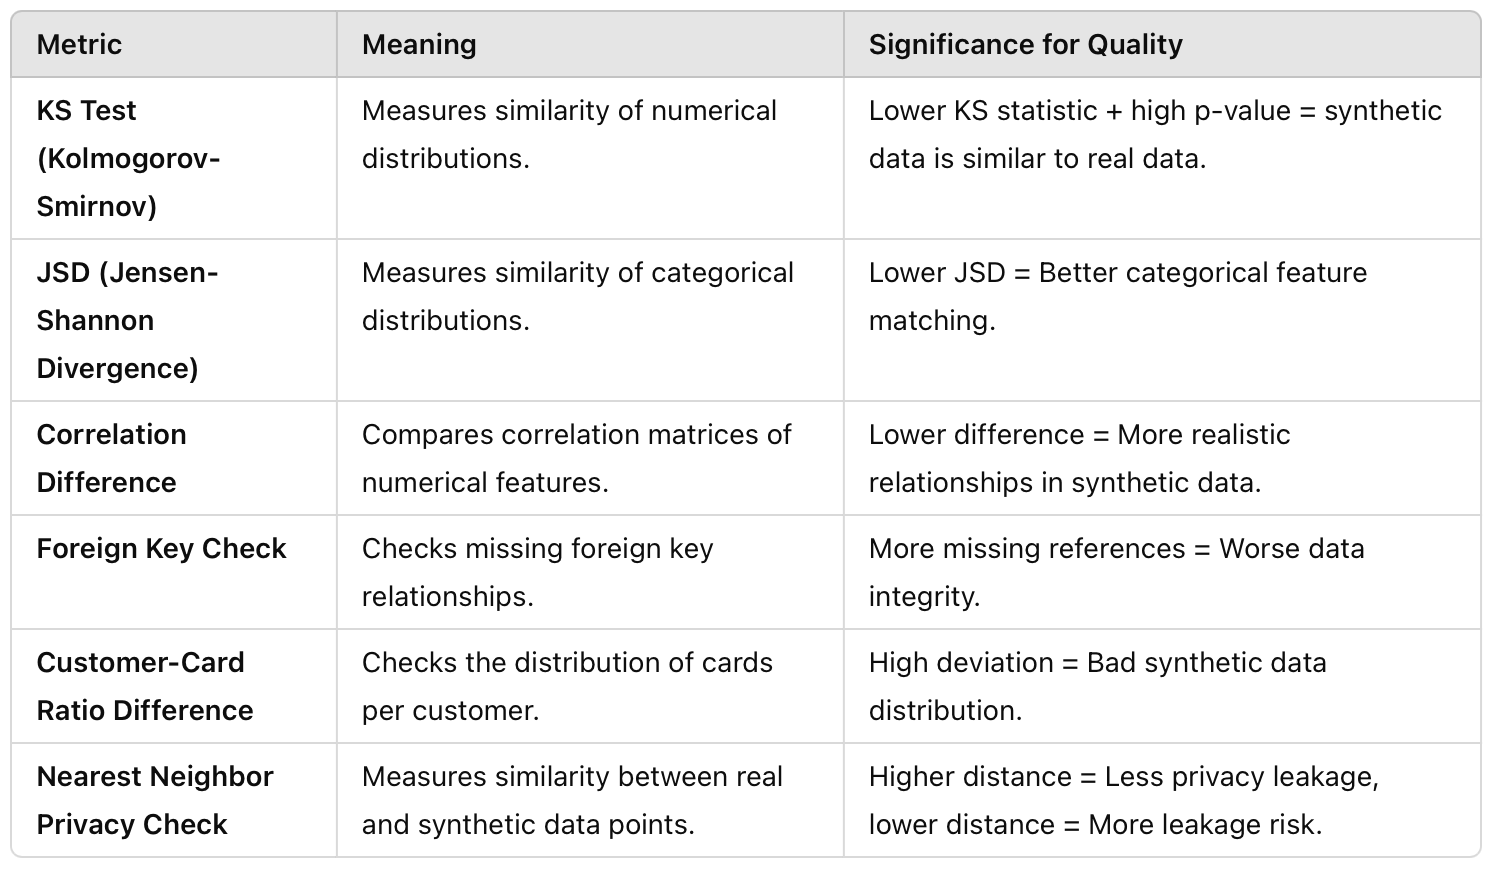

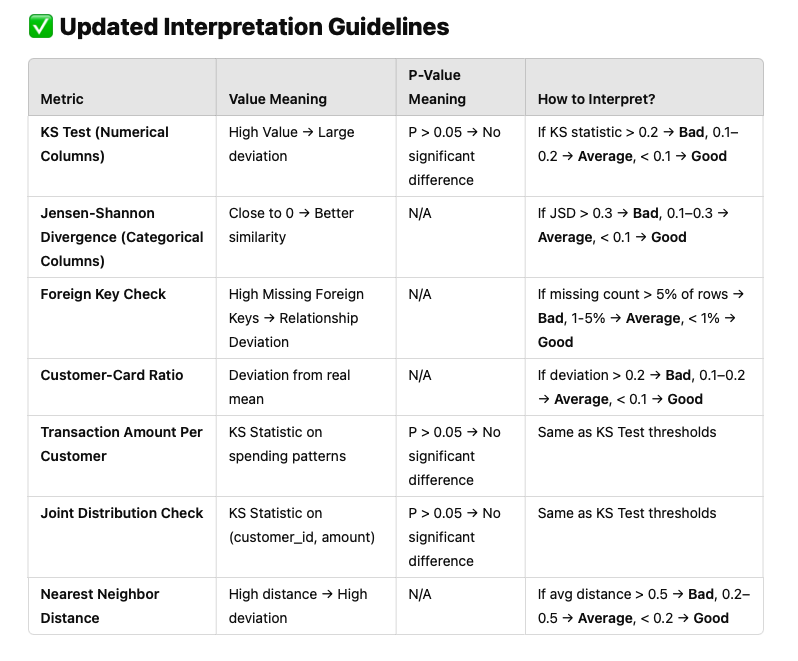

In [37]:
evaluator = StatsEvaluator(tables, synthetic_data)
evaluation_results = evaluator.evaluate()
evaluation_results

Metric             Table Name  \
0                           KS Test         customers_info   
1                               JSD         customers_info   
2                               JSD         customers_info   
3                               JSD         customers_info   
4                               JSD         customers_info   
5                               JSD         customers_info   
6                               JSD         customers_info   
7                           KS Test           transactions   
8                           KS Test           transactions   
9                           KS Test           transactions   
10                          KS Test           transactions   
11                              JSD           transactions   
12                              JSD           transactions   
13                          KS Test           credit_cards   
14                          KS Test           credit_cards   
15                          KS Test           credit_cards   
16                          KS Test           credit_cards   
17                          KS Test           credit_cards   
18                              JSD           credit_cards   
19                              JSD           credit_cards   
20                          KS Test  customer_demographics   
21                              JSD  customer_demographics   
22                              JSD  customer_demographics   
23                              JSD  customer_demographics   
24                              JSD  customer_demographics   
25                              JSD  customer_demographics   
26                              JSD  customer_demographics   
27                Foreign Key Check           transactions   
28              Customer-Card Ratio           credit_cards   
29  Transaction Amount Per Customer           transactions   
30         Joint Distribution Check           transactions   
31        Nearest Neighbor Distance             All Tables   

           Column Name Column DType  Value  P-Value Evaluation  
0          customer_id    Numerical 0.0100   1.0000       Good  
1           first_name  Categorical 0.3771      NaN        Bad  
2            last_name  Categorical 0.3980      NaN        Bad  
3                email  Categorical 0.4142      NaN        Bad  
4         phone_number  Categorical 0.4036      NaN        Bad  
5              address  Categorical 0.4253      NaN        Bad  
6       account_status  Categorical 0.0173      NaN       Good  
7       transaction_id    Numerical 0.1758   0.0001    Average  
8          customer_id    Numerical 0.0443   0.8839       Good  
9              card_id    Numerical 0.0661   0.4445       Good  
10              amount    Numerical 0.0655   0.4564       Good  
11            merchant  Categorical 0.3911      NaN        Bad  
12    transaction_type  Categorical 0.1485      NaN    Average  
13             card_id    Numerical 0.0300   1.0000       Good  
14         customer_id    Numerical 0.1473   0.2062    Average  
15         card_number    Numerical 0.5879   0.0000        Bad  
16        credit_limit    Numerical 0.1039   0.6125    Average  
17                 cvv    Numerical 0.1281   0.3506    Average  
18           card_type  Categorical 0.0704      NaN       Good  
19         card_status  Categorical 0.1247      NaN    Average  
20         customer_id    Numerical 0.0000   1.0000       Good  
21              gender  Categorical 0.0596      NaN       Good  
22      marital_status  Categorical 0.0893      NaN       Good  
23        income_range  Categorical 0.1236      NaN    Average  
24     education_level  Categorical 0.0919      NaN       Good  
25   employment_status  Categorical 0.0994      NaN       Good  
26      home_ownership  Categorical 0.0683      NaN       Good  
27         customer_id  Categorical 0.0000      NaN       Good  
28         customer_id  Categorical 0.1013      NaN    Average  
29         customer_id    Numeri

## Drift Evaluator

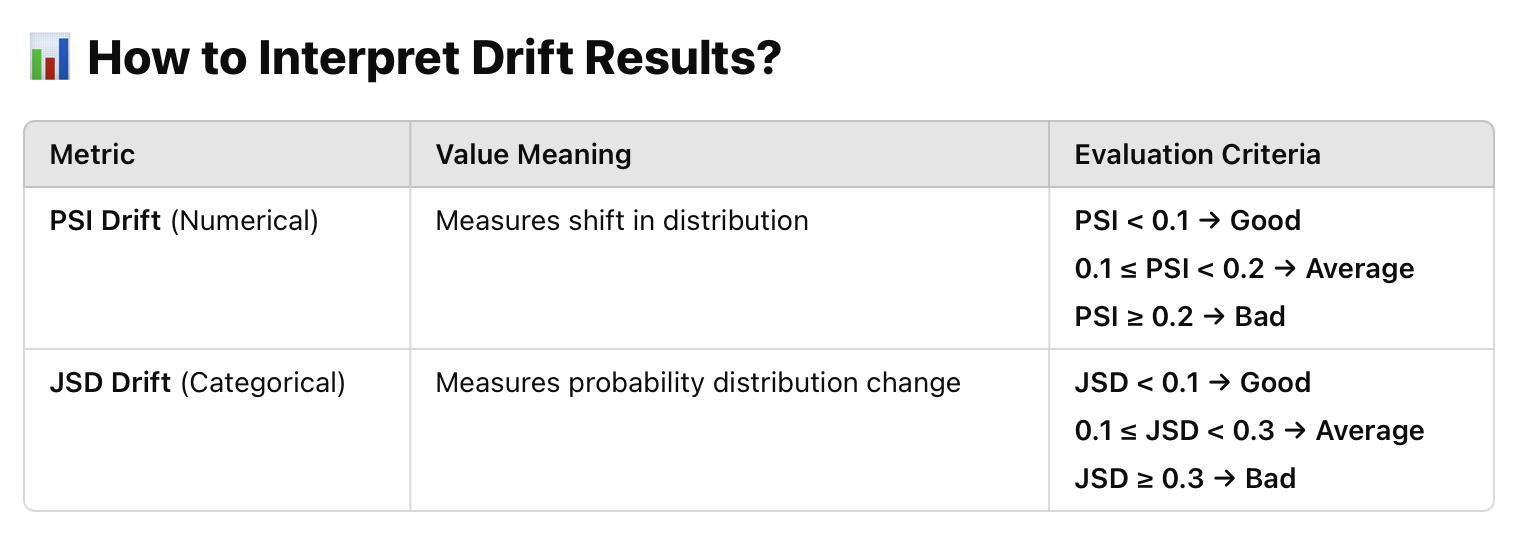

In [38]:
class DriftEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def population_stability_index(self, table_name, real_df, synth_df, num_cols):
        results = []
        for col in num_cols:
            real_bins = np.histogram(real_df[col], bins=10)[0] / len(real_df)
            synth_bins = np.histogram(synth_df[col], bins=10)[0] / len(synth_df)
            
            psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)
            psi = np.sum(psi_values)

            evaluation = "Good" if psi < 0.1 else "Average" if psi < 0.2 else "Bad"
            results.append(["PSI Drift", table_name, col, "Numerical", psi, None, evaluation])
        return results

    def drift_detection(self):
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.population_stability_index(table, real_df, synth_df, num_cols))

            for col in cat_cols:
                real_dist = real_df[col].value_counts(normalize=True).sort_index()
                synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

                all_categories = set(real_dist.index).union(set(synth_dist.index))
                real_dist = real_dist.reindex(all_categories, fill_value=0)
                synth_dist = synth_dist.reindex(all_categories, fill_value=0)

                jsd = jensenshannon(real_dist, synth_dist)
                evaluation = "Good" if jsd < 0.1 else "Average" if jsd < 0.3 else "Bad"
                results.append(["JSD Drift", table, col, "Categorical", jsd, None, evaluation])

        return results

    def evaluate(self):
        results = []
        results.extend(self.drift_detection())

        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value", "Evaluation"])
        return df_results


In [39]:
evaluator = DriftEvaluator(tables, synthetic_data)
evaluation_results = evaluator.evaluate()
evaluation_results

/var/folders/n4/nw0mfq3s59zc2v6llpk2xmvw0000gn/T/ipykernel_37076/4224457360.py:17: RuntimeWarning: invalid value encountered in divide
  psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)
/var/folders/n4/nw0mfq3s59zc2v6llpk2xmvw0000gn/T/ipykernel_37076/4224457360.py:17: RuntimeWarning: divide by zero encountered in log
  psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)


Metric             Table Name        Column Name Column DType  Value  \
0   PSI Drift         customers_info        customer_id    Numerical 0.0000   
1   JSD Drift         customers_info         first_name  Categorical 0.3771   
2   JSD Drift         customers_info          last_name  Categorical 0.3980   
3   JSD Drift         customers_info              email  Categorical 0.4142   
4   JSD Drift         customers_info       phone_number  Categorical 0.4036   
5   JSD Drift         customers_info            address  Categorical 0.4253   
6   JSD Drift         customers_info     account_status  Categorical 0.0173   
7   PSI Drift           transactions     transaction_id    Numerical 0.0002   
8   PSI Drift           transactions        customer_id    Numerical 0.0306   
9   PSI Drift           transactions            card_id    Numerical 0.0340   
10  PSI Drift           transactions             amount    Numerical 0.1351   
11  JSD Drift           transactions           merchant  Categorical 0.3911   
12  JSD Drift           transactions   transaction_type  Categorical 0.1485   
13  PSI Drift           credit_cards            card_id    Numerical 0.0023   
14  PSI Drift           credit_cards        customer_id    Numerical 0.1555   
15  PSI Drift           credit_cards        card_number    Numerical 0.0036   
16  PSI Drift           credit_cards       credit_limit    Numerical 0.1084   
17  PSI Drift           credit_cards                cvv    Numerical 0.4615   
18  JSD Drift           credit_cards          card_type  Categorical 0.0704   
19  JSD Drift           credit_cards        card_status  Categorical 0.1247   
20  PSI Drift  customer_demographics        customer_id    Numerical 0.0000   
21  JSD Drift  customer_demographics             gender  Categorical 0.0596   
22  JSD Drift  customer_demographics     marital_status  Categorical 0.0893   
23  JSD Drift  customer_demographics       income_range  Categorical 0.1236   
24  JSD Drift  customer_demographics    education_level  Categorical 0.0919   
25  JSD Drift  customer_demographics  employment_status  Categorical 0.0994   
26  JSD Drift  customer_demographics     home_ownership  Categorical 0.0683   

   P-Value Evaluation  
0     None       Good  
1     None        Bad  
2     None        Bad  
3     None        Bad  
4     None        Bad  
5     None        Bad  
6     None       Good  
7     None       Good  
8     None       Good  
9     None       Good  
10    None    Average  
11    None        Bad  
12    None    Average  
13    None       Good  
14    None    Average  
15    None       Good  
16    None    Average  
17    None        Bad  
18    None       Good  
19    None    Average  
20    None       Good  
21    None       Good  
22    None       Good  
23    None    Average  
24    None       Good  
25    None       Good  
26    None       Good

## Drift analysis

In [ ]:
import pandas as pd
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, DataQualityPreset

class EvidentlyEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def evaluate_table(self, table_name):
        real_df, synth_df = self.real_data[table_name], self.synthetic_data[table_name]

        drift_report = Report(metrics=[DataDriftPreset()])
        drift_report.run(reference_data=real_df, current_data=synth_df)

        quality_report = Report(metrics=[DataQualityPreset()])
        quality_report.run(reference_data=real_df, current_data=synth_df)

        return drift_report, quality_report

    def evaluate_all(self):
        results = {}
        for table in self.real_data.keys():
            drift_report, quality_report = self.evaluate_table(table)
            results[table] = {"Drift Report": drift_report, "Quality Report": quality_report}
        return results